## Tree selection and spasce placement

The first RL model that I think that we can use would be a model that first place trees and then label the ground

Assuming our action space is the following:

Trees
- Open Canopy
- Intermediate Canopy
- Radius is random? IDK I don't see it in the data

First calculate what is the average amount of sunlight in an area from the shrub collection
- if all are low, then all spots should be classified as full shade
- if there are some semi-shade/no shade, then we will clasiffy the spots using the radius from the tree

The question then become how do we select the radius for each shade cover? 
- Problem 1, radius should be associated with the type of tree
    - Counter argument, selecting radius within a certain distribution could lead to more varying kinds of generation
- let's set the radius to be around 15 units to about 25 units/ either or


ie the goals will be to select for each tree planting spot, either 
- an intermediate canopy or open canopy plant
- Setting the shading radius it provides to either 15 or 25 units

- reward the model for planting more species (based on the theme)


What will its actions be, given that each tree can either fit into interediate canopy or open canopy

Imma assume that I will accept 0 to 3 trees, therefore for each category there are the following situatoin
- No trees of that type
- 1 tree of that type
- 2 or 3 trees of that type


Therefore,
inputs
- list of 6 plants that could be a mixture of shrubs/trees
- theme of what is the surrounding
- Tree coordinates and shrub coordinates

prep
- Interpret the list of figure out how many of each type of each tree there are 
- Preemptively label the trees randomly to create a 50/50
- Given that label them 1a, 1b, 2a, 2b , 3a, 3b accordingly so that it can be generalised to type of plant choice first


## The first step

Create a function to help me extract number of plants and shrubs from the example data and create fake selection of plants

In [5]:
exampleData = {'response': '200', 'api_resp': [{'_index': 'flora', '_id': 'Ucz7y5IBzYt0LoDihG73', '_score': 4.886512, '_source': {'Scientific Name': 'Horsfieldia irya (Gaertn.) Warb.', 'Common Name': 'Pianggu', 'Species ID': 2964, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/9/2964', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Lots of Water', 'Moderate Water'], 'Drought Tolerant': False, 'Native to SG': True, 'Fruit Bearing': False, 'Fragrant Plant': True, 'Maximum Height (m)': 30.0, 'Flower Colour': 'Orange, Yellow / Golden', 'Hazard': 'N/A', 'Attracted animals': 'Bird-Attracting (Fruits)', 'Native habitat': 'Terrestrial (Primary Rainforest, Coastal Forest, Riverine, Secondary Rainforest, Freshwater Swamp Forest), Shoreline (Mangrove Forest)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Fissured, Cracked', 'Trunk Colour': 'red', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'U8z7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Parkia speciosa Hassk.', 'Common Name': 'Petai', 'Species ID': 3052, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/3/0/3052', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Moderate Water'], 'Drought Tolerant': False, 'Native to SG': True, 'Fruit Bearing': False, 'Fragrant Plant': True, 'Maximum Height (m)': 45.0, 'Flower Colour': 'Cream / Off-White, White, Yellow / Golden', 'Hazard': 'N/A', 'Attracted animals': 'Bird-Attracting, Butterfly Host Plant, Bat Food', 'Native habitat': 'Terrestrial (Primary Rainforest, Secondary Rainforest, Riverine)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '2.5 (Tree - Open Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'smooth', 'Trunk Colour': 'reddish-brown', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'WMz7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Cassia grandis L. f.', 'Common Name': 'Horse Cassia', 'Species ID': 2788, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/7/2788', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Moderate Water'], 'Drought Tolerant': False, 'Native to SG': False, 'Fruit Bearing': False, 'Fragrant Plant': None, 'Maximum Height (m)': 25.0, 'Flower Colour': 'Orange, Pink, Red', 'Hazard': 'N/A', 'Attracted animals': 'N/A', 'Native habitat': 'Terrestrial (Riverine)', 'Mature Leaf Colour': 'Green, Purple', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '2.5 (Tree - Open Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Smooth', 'Trunk Colour': 'Light grey', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'Wcz7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Cratoxylum cochinchinense (Lour.) Blume', 'Common Name': 'Derum Selunchor', 'Species ID': 2829, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/8/2829', 'Plant Type': ['Shrub', 'Tree'], 'Light Preference': ['Full Sun', 'Semi Shade'], 'Water Preference': ['Moderate Water'], 'Drought Tolerant': False, 'Native to SG': True, 'Fruit Bearing': False, 'Fragrant Plant': True, 'Maximum Height (m)': 30.0, 'Flower Colour': 'Red, Orange, Pink', 'Hazard': 'N/A', 'Attracted animals': 'Butterfly Host Plant (Leaves, Associated with: Eurema  hecabe contubernalis (Moore, 1886), Lexias pardalis), Bee-Attracting', 'Native habitat': 'Terrestrial (Secondary Rainforest, Primary Rainforest, Freshwater Swamp Forest)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'Red', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Peeling / Flaking / Papery, Smooth', 'Trunk Colour': 'Reddish-brown', 'Leaf Texture': ['Medium']}}, {'_index': 'flora', '_id': 'W8z7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Corymbia ptychocarpa (F. Muell.) K. D. Hill & L. A. S. Johnson', 'Common Name': 'Spring Bloodwood', 'Species ID': 2887, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/8/2887', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Lots of Water', 'Moderate Water'], 'Drought Tolerant': False, 'Native to SG': False, 'Fruit Bearing': False, 'Fragrant Plant': None, 'Maximum Height (m)': 20.0, 'Flower Colour': 'Pink, Red', 'Hazard': 'N/A', 'Attracted animals': 'Bird-Attracting', 'Native habitat': 'Terrestrial (Secondary Rainforest, Riverine)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Fissured', 'Trunk Colour': 'Reddish-brown to greyish-brown', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'XMz7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Cola gigantea A.Chev.', 'Common Name': 'Giant Cola', 'Species ID': 2821, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/8/2821', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Moderate Water'], 'Drought Tolerant': False, 'Native to SG': False, 'Fruit Bearing': False, 'Fragrant Plant': None, 'Maximum Height (m)': 35.0, 'Flower Colour': 'Purple', 'Hazard': 'N/A', 'Attracted animals': 'N/A', 'Native habitat': 'Terrestrial', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'brown', 'Trunk Colour': 'brown', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'Xcz7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Erythrina fusca Lour.', 'Common Name': 'Coral Tree', 'Species ID': 2879, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/8/2879', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Moderate Water'], 'Drought Tolerant': False, 'Native to SG': False, 'Fruit Bearing': False, 'Fragrant Plant': None, 'Maximum Height (m)': 15.0, 'Flower Colour': 'Orange, Red', 'Hazard': 'Spines/Thorns - Stem/Branch, Spines/Thorns - Trunk, Toxic Upon Ingestion', 'Attracted animals': 'N/A', 'Native habitat': 'Terrestrial (Coastal Forest, Riverine), Shoreline (Sandy Beach)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Peeling / Flaking / Papery', 'Trunk Colour': 'Brownish grey, brown', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'X8z7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Samanea saman (Jacq.) Merr.', 'Common Name': 'Rain Tree', 'Species ID': 3106, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/3/1/3106', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Moderate Water'], 'Drought Tolerant': False, 'Native to SG': False, 'Fruit Bearing': False, 'Fragrant Plant': None, 'Maximum Height (m)': 30.0, 'Flower Colour': 'Pink, White', 'Hazard': 'N/A', 'Attracted animals': 'N/A', 'Native habitat': 'Terrestrial (Primary Rainforest, Grassland / Savannah/ Scrubland)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '2.5 (Tree - Open Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Fissured', 'Trunk Colour': 'Dark brown', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'ZMz7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Xanthostemon chrysanthus (F.Muell.) Benth.', 'Common Name': 'Golden Penda', 'Species ID': 3200, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/3/2/3200', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Lots of Water', 'Moderate Water'], 'Drought Tolerant': False, 'Native to SG': False, 'Fruit Bearing': False, 'Fragrant Plant': None, 'Maximum Height (m)': 40.0, 'Flower Colour': 'Yellow / Golden', 'Hazard': 'N/A', 'Attracted animals': 'Bird-Attracting, Butterfly-Attracting, Bee-Attracting', 'Native habitat': 'Terrestrial (Primary Rainforest, Secondary Rainforest)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'Red', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Scaly, Smooth', 'Trunk Colour': 'Brown', 'Leaf Texture': ['N/A']}}, {'_index': 'flora', '_id': 'Zsz7y5IBzYt0LoDihG73', '_score': 1.0320289, '_source': {'Scientific Name': 'Sterculia macrophylla Vent.', 'Common Name': 'Broad-leaved Sterculia', 'Species ID': 3138, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/3/1/3138', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Lots of Water', 'Moderate Water'], 'Drought Tolerant': False, 'Native to SG': True, 'Fruit Bearing': False, 'Fragrant Plant': None, 'Maximum Height (m)': 40.0, 'Flower Colour': 'Yellow / Golden, Pink', 'Hazard': 'N/A', 'Attracted animals': 'Bird-Attracting', 'Native habitat': 'Terrestrial (Primary Rainforest, Secondary Rainforest, Freshwater Swamp Forest)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'Red', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'smooth', 'Trunk Colour': 'light grey', 'Leaf Texture': ['N/A']}}]}

In [6]:
print(exampleData['api_resp'])

[{'_index': 'flora', '_id': 'Ucz7y5IBzYt0LoDihG73', '_score': 4.886512, '_source': {'Scientific Name': 'Horsfieldia irya (Gaertn.) Warb.', 'Common Name': 'Pianggu', 'Species ID': 2964, 'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/9/2964', 'Plant Type': ['Tree'], 'Light Preference': ['Full Sun'], 'Water Preference': ['Lots of Water', 'Moderate Water'], 'Drought Tolerant': False, 'Native to SG': True, 'Fruit Bearing': False, 'Fragrant Plant': True, 'Maximum Height (m)': 30.0, 'Flower Colour': 'Orange, Yellow / Golden', 'Hazard': 'N/A', 'Attracted animals': 'Bird-Attracting (Fruits)', 'Native habitat': 'Terrestrial (Primary Rainforest, Coastal Forest, Riverine, Secondary Rainforest, Freshwater Swamp Forest), Shoreline (Mangrove Forest)', 'Mature Leaf Colour': 'Green', 'Young Flush Leaf Colour': 'N/A', 'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)', 'Growth rate': ['Moderate'], 'Trunk Texture': 'Fissured, Cracked', 'Trunk Colour': 'red', 'Leaf Texture': ['N/A']}}, {'_ind

In [7]:
import random
import re

def selectRandomTrees(num_items: int, input_list= exampleData['api_resp']):
    if num_items > len(input_list):
        selected_items = input_list
    else:
        selected_items = random.sample(input_list, num_items)

    # Initialize counts for canopy types
    canopy_counts = {'Open Canopy': 0, 'Intermediate Canopy': 0}
    
    for entry in selected_items:
        leaf_area_index = entry['_source'].get('Leaf Area Index', '')
        # Use regex to check for 'Open Canopy' and 'Intermediate Canopy'
        if re.search(r'\bOpen Canopy\b', leaf_area_index):
            canopy_counts['Open Canopy'] += 1
        elif re.search(r'\bIntermediate Canopy\b', leaf_area_index):
            canopy_counts['Intermediate Canopy'] += 1

    return {
        'selected_items': selected_items,
        'canopy_counts': canopy_counts
    }

selectRandomTrees(3)

{'selected_items': [{'_index': 'flora',
   '_id': 'Xcz7y5IBzYt0LoDihG73',
   '_score': 1.0320289,
   '_source': {'Scientific Name': 'Erythrina fusca Lour.',
    'Common Name': 'Coral Tree',
    'Species ID': 2879,
    'Link': 'https://www.nparks.gov.sg/florafaunaweb/flora/2/8/2879',
    'Plant Type': ['Tree'],
    'Light Preference': ['Full Sun'],
    'Water Preference': ['Moderate Water'],
    'Drought Tolerant': False,
    'Native to SG': False,
    'Fruit Bearing': False,
    'Fragrant Plant': None,
    'Maximum Height (m)': 15.0,
    'Flower Colour': 'Orange, Red',
    'Hazard': 'Spines/Thorns - Stem/Branch, Spines/Thorns - Trunk, Toxic Upon Ingestion',
    'Attracted animals': 'N/A',
    'Native habitat': 'Terrestrial (Coastal Forest, Riverine), Shoreline (Sandy Beach)',
    'Mature Leaf Colour': 'Green',
    'Young Flush Leaf Colour': 'N/A',
    'Leaf Area Index': '3.0 (Tree - Intermediate Canopy)',
    'Growth rate': ['Moderate'],
    'Trunk Texture': 'Peeling / Flaking / Papery

Loaded model from ./models/23rd.zip
Episode finished after 330 steps
Trees placed at: [(16, 8), (82, 94)]
Shrubs placed at: [(6, 16), (6, 26), (6, 36), (14, 52), (15, 31), (16, 18), (16, 42), (20, 60), (24, 24), (24, 36), (26, 6), (32, 16), (36, 28), (56, 84), (58, 94), (64, 72), (68, 92), (72, 8), (72, 56), (74, 66), (76, 76), (76, 86), (80, 16), (80, 40), (82, 6), (82, 50), (84, 60), (84, 70), (85, 81), (88, 22), (88, 34), (92, 54), (92, 90), (94, 64), (94, 74)]


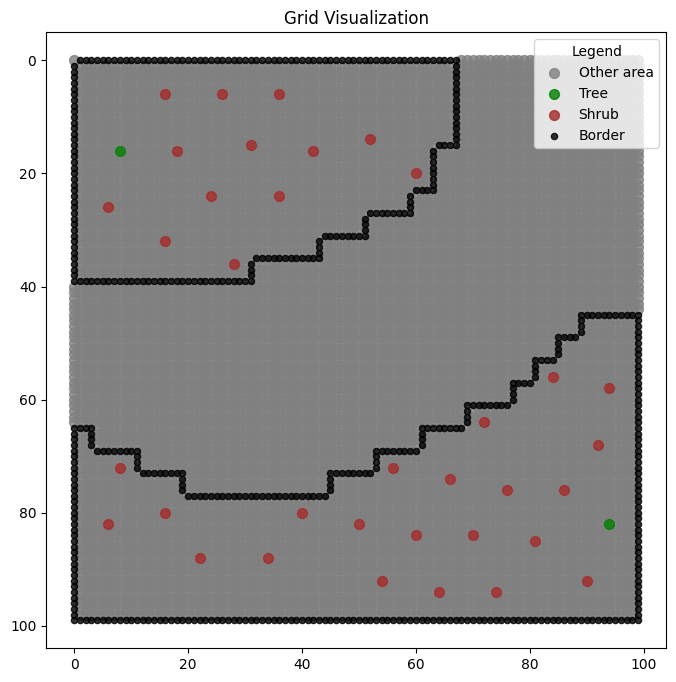

In [8]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
import random
from perlin_noise import PerlinNoise
from scipy.spatial.distance import cdist
import cv2
import matplotlib.pyplot as plt
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.colors as mcolors
import os

# Environment Class
class customSpatialEnv(gym.Env):
    def __init__(self, octave:float, grid_size:tuple=(100,100)):
        """
        Args:
            octave (float): octave value from range [1-2] for perlin noise
            grid_size (tuple): (w, h) of grid, defaults to (100, 100)
        """
        super(customSpatialEnv, self).__init__()

        # Create 100x100 grid
        self.grid_size = grid_size
        self.octave = octave
        self.max_attempts = 100000  # Maximum number of attempts
        self.attempt_counter = 0  # Tracks the number of attempts

        self.grid, self.planting_coordinates, self.distances = self._create_environment()

        # Plants: 1 for Tree, 2 for Shrub, 0 for No plant (added)
        self.plants = np.array([0, 1, 2])  # [No Plant, Tree, Shrub]

        # Action space: Use Box for percentage (horizontal, vertical) and plant type (no object, shrub, tree)
        self.action_space = spaces.Box(low=0.0, high=1.0, shape=(3,), dtype=np.float32)

        # Observation space: Dict containing the grid and distances (both horizontal and vertical)
        self.observation_space = spaces.Dict({
            "horizontal_distance": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),  # Horizontal distance (left)
            "vertical_distance": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),    # Vertical distance (top)
            "tree_proportion": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),  # Proportion of trees
            "shrub_proportion": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),  # Proportion of shrubs
            "good_tree_spot": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),    # Whether the spot is good for planting a tree
            "border_score": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32)  
        })

        self.num_trees = 0
        self.num_shrubs = 0
        self.planted_tree_positions = []

    def reset(self, seed=None, options=None):
        """
        Reset the environment to its initial state.
        """
        super().reset(seed=seed)  # Ensure that we call the parent class reset for seeding

        # Recreate the environment (reinitialize grid, planting coordinates, and distances)
        self.grid, self.planting_coordinates, self.distances = self._create_environment()
        self.attempt_counter = 0

        # Start with the first planting coordinate if available, otherwise default to [0, 0] for distances
        if len(self.distances) > 0:
            initial_distances = self.distances[0]
        else:
            initial_distances = [0, 0]  # Handle case where no distances are available

        horizontal_distance, vertical_distance = initial_distances[1], initial_distances[0]

        # Ensure the distances are of type float32
        horizontal_distance = np.array([horizontal_distance], dtype=np.float32)
        vertical_distance = np.array([vertical_distance], dtype=np.float32)

        tree_proportion = np.array([0.0], dtype=np.float32)
        shrub_proportion = np.array([0.0], dtype=np.float32)
        good_tree_spot = np.array([0.0], dtype=np.float32)  # Initial boolean flag (False)
        border_score = np.array([0.0], dtype=np.float32)  # Initial boolean flag (False)

        # Initial observation
        return {
            "horizontal_distance": horizontal_distance,
            "vertical_distance": vertical_distance,
            "tree_proportion": tree_proportion,
            "shrub_proportion": shrub_proportion,
            "good_tree_spot": good_tree_spot,
            "border_score": border_score
        }, {}

    def step(self, action):
        """
        The step function takes a single action, which contains three parts:
        - action[0]: horizontal ratio (0-1).
        - action[1]: vertical ratio (0-1).
        - action[2]: plant type selector (0-1), now including No Plant.
        """

        self.attempt_counter += 1

        # Default value for reward (in case of termination due to exceeding max attempts)
        reward = 0  

        # If the number of attempts exceeds max_attempts, terminate the episode with a penalty
        if self.attempt_counter > self.max_attempts:
            reward = -50  # Apply a significant penalty for exceeding maximum attempts
            terminated = True
            return {
                "horizontal_distance": np.array([0.0], dtype=np.float32),
                "vertical_distance": np.array([0.0], dtype=np.float32),
                "tree_proportion": np.array([0.0], dtype=np.float32),
                "shrub_proportion": np.array([0.0], dtype=np.float32),
                "good_tree_spot": np.array([0.0], dtype=np.float32),
                "border_score": np.array([0.0], dtype=np.float32)
            }, reward, terminated, False, {}

        # Unpack the action
        horizontal_ratio = action[0]
        vertical_ratio = action[1]
        plant_type_selector = action[2]

        # Use the horizontal and vertical ratio to find the nearest planting coordinates
        horizontal_target = horizontal_ratio * self.grid_size[1]  # Scale to grid width
        vertical_target = vertical_ratio * self.grid_size[0]  # Scale to grid height

        # Find the closest coordinate to the generated ratio
        coord_index = np.argmin(np.sum(np.abs(self.planting_coordinates - [vertical_target, horizontal_target]), axis=1))

        # Calculate the difference between the target and the selected plantable coordinates
        selected_coord = self.planting_coordinates[coord_index]
        diff = np.linalg.norm(np.array([vertical_target, horizontal_target]) - np.array(selected_coord))

        # Penalize if the distance is greater than 0.5
        if diff > 20:
            reward = 0  # Apply a penalty for selecting a coordinate that is too far from any plantable spot
            terminated = False
            truncated = False
            return {
                "horizontal_distance": np.array([0.0], dtype=np.float32),
                "vertical_distance": np.array([0.0], dtype=np.float32),
                "tree_proportion": np.array([0.0], dtype=np.float32),
                "shrub_proportion": np.array([0.0], dtype=np.float32),
                "good_tree_spot": np.array([0.0], dtype=np.float32),
                "border_score": np.array([0.0], dtype=np.float32)
            }, reward, terminated, truncated, {}

        # Use the plant type selector to determine the plant type
        if plant_type_selector < 0.33:
            plant_type = 0  # No Plant (new option)
        elif plant_type_selector < 0.66:
            plant_type = 1  # Tree
        else:
            plant_type = 2  # Shrub

        # The rest of the planting logic if a valid spot is selected
        planting_coord = self.planting_coordinates[coord_index]

        if self.grid[planting_coord[0], planting_coord[1]] == 125:  # Plantable spot
            # Update the grid with the selected plant type (1: Tree, 2: Shrub)
            self.grid[planting_coord[0], planting_coord[1]] = self.plants[plant_type]

            if len(self.distances) > 0:  # Ensure there are distances to access
                horizontal_distance, vertical_distance = self.distances[min(coord_index, len(self.distances) - 1)]
            else:
                horizontal_distance, vertical_distance = 0.0, 0.0

            # Remove the planted coordinate from the list to avoid planting again in the same spot
            self.planting_coordinates = np.delete(self.planting_coordinates, coord_index, axis=0)
            self.distances = np.delete(self.distances, coord_index, axis=0)

            ####################################################################################
            ### Shrub Proportion and Tree proportion and reward mechanism
            #  Calculate tree and shrub proportions
            total_plants = self.num_trees + self.num_shrubs
            tree_proportion = self.num_trees / total_plants if total_plants > 0 else 0
            shrub_proportion = self.num_shrubs / total_plants if total_plants > 0 else 0
            balance_reward = 0

            # Update tree and shrub counts
            if self.plants[plant_type] == 1:
                self.num_trees += 1
                self.planted_tree_positions.append(planting_coord)  # Track tree positions
                if tree_proportion > 0.2:
                    balance_reward += 2

            elif self.plants[plant_type] == 2:
                self.num_shrubs += 1
                if shrub_proportion > 0.6:
                    balance_reward += 1

            ####################################################################################
            ### Good Tree Spot and Distance mechanism
            good_tree_spot = 1.0  # Assume the spot is good initially
            if plant_type == 1:  # Only check for trees
                for tree_pos in self.planted_tree_positions:
                    if np.array_equal(tree_pos, planting_coord):
                        continue
                    # Calculate the distance between the planted tree and all other trees
                    dist = np.linalg.norm(np.array(planting_coord) - np.array(tree_pos))
                    if dist < 50:  # If any tree is within 50 units, it's not a good spot
                        good_tree_spot = 0.0
                        break
            distance_reward = 0.5
            # Only apply reward for trees (plant_type == 1)
            if self.plants[plant_type] == 1:
                # Apply a reward based on how far the nearest tree is, capped at 50 units
                if good_tree_spot == 1.0:
                    distance_reward = 1  # Normalize reward (closer to 50 = higher reward)
                else:
                    distance_reward = 0

            ####################################################################################

            ### Border Score Segment

            # Retrieve the distances for the selected planting coordinate
            if len(self.distances) > 0:
                horizontal_distance, vertical_distance = self.distances[min(coord_index, len(self.distances) - 1)]
            else:
                horizontal_distance, vertical_distance = 0.0, 0.0

            border_score = 0
            if (abs(horizontal_distance - 0.5) + abs(vertical_distance - 0.5)) > 0.8:
                border_score = 1

            ####################################################################################

            ### Total reward Segment
            reward = 3 * balance_reward + 2 *distance_reward + border_score
            ####################################################################################

            if plant_type == 0:
            # No planting is done, but a small positive reward could be given to avoid excessive no-action use
                reward = 1

        else:
            # Penalize for trying to plant on a non-plantable spot
            reward = -1
            horizontal_distance, vertical_distance = 0.0, 0.0  # Set to zero if invalid action
            tree_proportion = self.num_trees / (self.num_trees + self.num_shrubs) if (self.num_trees + self.num_shrubs) > 0 else 0
            shrub_proportion = self.num_shrubs / (self.num_trees + self.num_shrubs) if (self.num_trees + self.num_shrubs) > 0 else 0
            good_tree_spot = 0.0

        # Ensure the distances are of type float32
        horizontal_distance = np.array([horizontal_distance], dtype=np.float32)
        vertical_distance = np.array([vertical_distance], dtype=np.float32)
        tree_proportion = np.array([tree_proportion], dtype=np.float32)
        shrub_proportion = np.array([shrub_proportion], dtype=np.float32)
        good_tree_spot = np.array([good_tree_spot], dtype=np.float32)
        border_score = np.array([border_score], dtype=np.float32)

        # Observation: the current state of the environment (grid, distances, and tree/shrub proportions)
        observation = {
            "horizontal_distance": horizontal_distance,
            "vertical_distance": vertical_distance,
            "tree_proportion": tree_proportion,
            "shrub_proportion": shrub_proportion,
            "good_tree_spot": good_tree_spot,
            "border_score": border_score
        }

        # Check if the episode should end (plant all possible spots)
        terminated = len(self.planting_coordinates) == 0

        # Truncated remains False
        truncated = False

        info = {
            'diff': diff  # Add diff to the info dictionary
        }

        return observation, reward, terminated, truncated, info


    def _create_environment(self):
        """
        Function to create a test environment
        Runs perlin noise, dithers
        Ensure that at least 7.5% is plantable
        Filters to ensure minimum 10 grid between all coordinates

        Returns:
            planting_grid (np.ndarray): self.grid_size grid of 0 for unplantable and 1 for plantable
            planting_coord (np.ndarray): (1, num_planting_coord) numpy array
        """ 
        while True:
            noise = PerlinNoise(octaves=self.octave, seed = random.randint(0, 50))
            width, height = self.grid_size

            # Create environment and dither
            perlin_env = np.array([[noise([i/height, j/width]) for j in range(width)] for i in range(height)])
            dithered_perlin_env = self._dither_environment(perlin_env)

            # Check density, more than 7.5% must be plantable
            planting_positions = np.argwhere(dithered_perlin_env == 1)
            planting_density = len(planting_positions) / len(dithered_perlin_env.flatten())

            # If planting density too low, recreate environment with a random grid
            if planting_density > 7.5/100:
                break

        planting_grid, planting_coords  = self._filter_environment(planting_positions)
        boundary = self._draw_and_return_boundary_only(dithered_perlin_env) #just remember to change the input accordingly
        distances, final_grid = self._create_distance_list_grid(planting_grid, boundary, planting_coords)

        return final_grid, planting_coords, distances

    def _dither_environment(self, perlin_env:np.ndarray):
        """
        Function to dither perlin environment using bayer matrix
        
        Args:
            perlin_env (np.ndarray): self.grid_size numpy array with random noise from perlin

        Returns:
            dithered_grid (np.ndarray): self.grid_size grid of 0 for unplantable and 1 for plantable
        """
        # 4x4 Normalised Bayer matrix
        bayer_matrix = np.array([
            [0, 8, 2, 10],
            [12, 4, 14, 6],
            [3, 11, 1, 9],
            [15, 7, 13, 5]
        ]) / 16.0  # Normalisation

        # Dither with Bayer Matrix
        bayer_tile_size = bayer_matrix.shape[0]  # Size of the Bayer matrix (4x4)
        dithered_grid = np.zeros_like(perlin_env)
        width, height = self.grid_size

        # Apply Bayer matrix
        for y in range(height):
            for x in range(width):
                bayer_value = bayer_matrix[y % bayer_tile_size, x % bayer_tile_size]
                dithered_grid[y, x] = 1 if perlin_env[y, x] > bayer_value else 0
        
        return dithered_grid

    def _filter_environment(self, planting_positions:np.ndarray):
        """
        Function to remove close coordinates, ensuring all coordinates are at least 10 apart
        All coordinates within 5 grid of the environment borders are also remove as a buffer effect
        
        Args:
            planting_positions (np.ndarray): numpy array of all plantable coordinates from dithering algorithm

        Returns:
            final_grid (np.ndarray): self.grid_size grid of 0 for unplantable and 1 for plantable
            final_planting_coordinates (np.ndarray): (1, num_planting_coord) numpy array        
        """
        min_distance = 10
        filtered_planting_positions = planting_positions.copy()
        
        # Calculate elucidean distance between coordinates
        distances = cdist(filtered_planting_positions, filtered_planting_positions)

        # Keep a numpy array of all filtered position and assume is true
        keep_array = np.ones(len(filtered_planting_positions), dtype=bool)

        # Check for points that are too close
        for i in range(len(filtered_planting_positions)):
            plant_coordinate = filtered_planting_positions[i]
            # Boundary of 5 pixel to prevent tress on the edge
            if plant_coordinate[0] <= 5 or plant_coordinate[0] >= (self.grid_size[0] -5):
                keep_array[i] = False
            
            if plant_coordinate[1] <= 5 or plant_coordinate[1] >= (self.grid_size[1] -5):
                keep_array[i] = False

            # Only consider points that haven't been removed
            if keep_array[i]:  
                for j in range(i + 1, len(filtered_planting_positions)):
                    if distances[i, j] < min_distance:
                        # Remove the second point if it's too close
                        keep_array[j] = False


        final_planting_coordinates = filtered_planting_positions[keep_array]
        # Final grid (All 0s)
        final_grid = np.zeros(self.grid_size)
        # Update grid with planting position
        for coordinates in final_planting_coordinates:
            final_grid[coordinates[0], coordinates[1]] = 1
        return final_grid, final_planting_coordinates

    def _draw_and_return_boundary_only(self, input_grid, threshold_value=128, contour_value=255, dilation_iterations=3):
        '''
        Draws a precise boundary around all yellow regions in the unfiltered grid and returns an array with only the boundary values.
        
        Parameters:
        - threshold_value: int -- the threshold value to segment the yellow area (default: 128).
        - contour_value: int -- the value to set for the boundary pixels in the array (default: 255 for white).
        - dilation_iterations: int -- number of iterations for dilating the image to smooth out the areas (default: 3).
        
        Returns:
        - boundary_array: np.array -- the NumPy array containing only the boundary values.
        '''
        
        # Access the unfiltered grid from the environment
        unfiltered_grid = input_grid
        # Normalize the array to the range 0-255 (assuming it's a float array in range 0-1)
        normalized_image = (unfiltered_grid * 255).astype(np.uint8)

        # Apply a threshold to isolate the yellow area
        _, thresh = cv2.threshold(normalized_image, threshold_value, 255, cv2.THRESH_BINARY)

        # Optionally dilate the thresholded image to fill in gaps in the contours
        if dilation_iterations > 0:
            kernel = np.ones((3, 3), np.uint8)
            thresh = cv2.dilate(thresh, kernel, iterations=dilation_iterations)

        # Find contours on the thresholded image (we only want external contours)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Create an empty array (same shape as normalized_image) to store only the boundary
        boundary_array = np.zeros_like(normalized_image)

        # Draw the contours on the boundary array (without the original regions, only the contours)
        cv2.drawContours(boundary_array, contours, -1, contour_value, thickness=1)

        # Optionally show the boundary array for visualization (you can remove this for efficiency in the environment)
        # plt.imshow(boundary_array, cmap='gray')
        # plt.show()

        # Return the boundary array for further use within the environment
        return boundary_array
    
    def _set_array_borders(self, arr, border_thickness = 5, value = 0):
        '''
        Sets the borders of the class's array to a specified value.
        
        Parameters:
        - border_thickness: int -- the thickness of the border to modify.
        - value: int or float -- the value to set for the borders.
        
        Modifies:
        - self.grid or any other attribute that stores the grid.
        '''
        
        # Assuming the class has a grid or unfiltered grid attribute, modify the array in place.

        # Set top and bottom borders
        arr[:border_thickness, :] = value  # Top border
        arr[-border_thickness:, :] = value  # Bottom border
        
        # Set left and right borders
        arr[:, :border_thickness] = value  # Left border
        arr[:, -border_thickness:] = value  # Right border
        
        # You can also return the modified grid if necessary
        return arr
    
    def _create_distance_list_grid(self, grid, boundary, coordinates):
        '''
        Create the list of distances of each node from the bouyndary values
        
        Parameters:
        - grid: int -- the thickness of the border to modify.
        - boundary: int or float -- the value to set for the borders.
        
        Modifies:
        - self.grid or any other attribute that stores the grid.
        '''

        directions = [
            (-1, 0),  #U
            (1, 0),  #D
            (0, -1), #L
            (0, 1)   #R
        ]

        distances = []
        testing_copy = np.copy(boundary)

        
        for coords in coordinates:
            if grid[coords[0], coords[1]] != 1:
                print("Not Seed position")
                continue

            starting_x, starting_y = coords[1], coords[0]
            testing_copy[coords[0], coords[1]] = 125

            temp_distances = []
            for x, y in directions:
                step = 0
                current_x, current_y = starting_x, starting_y
                while 0 <= current_x < self.grid_size[0] and 0 <= current_y < self.grid_size[1]:
                    step += 1
                    current_x += x
                    current_y += y
                    if boundary[current_x, current_y] == 255:
                        temp_distances.append(step)
                        break
                    if current_x == 0 or current_x == 99 or current_y == 0 or current_y == 99:
                        temp_distances.append(step)
                        break

            horizontal_distance_L = temp_distances[2]/(temp_distances[2] + temp_distances[3])
            horizontal_distance_R = temp_distances[3]/(temp_distances[2] + temp_distances[3])

            vertical_distance_D = temp_distances[1]/(temp_distances[0] + temp_distances[1])
            vertical_distance_U = temp_distances[0]/(temp_distances[0] + temp_distances[1])
            distances.append([vertical_distance_U, horizontal_distance_L])
        return distances, testing_copy

    
    
import matplotlib.patches as mpatches
    
def load_model(env):
    global model
    model = PPO("MultiInputPolicy", env, verbose=1, n_steps=2048, gamma=0.99, learning_rate=0.0003, ent_coef=0.05)
    return model

# Train the model without saving automatically
def train_model(env):
    global model
    model.learn(total_timesteps=100000)
    return model

# Function to render one episode and test the model
def render_episode(env, model):
    obs, _ = env.reset()
    step = 0
    while True:
        action, _states = model.predict(obs, deterministic=False)
        action, _states = model.predict(obs, deterministic=False)

        # Add some noise to the action to encourage exploration
        noise = np.random.normal(0, 0.1, size=action.shape)  # Adjust noise level as needed
        action += noise
        action = np.clip(action, 0, 1)
        obs, reward, terminated, truncated, info = env.step(action)
        step += 1
        diff = info.get('diff', None)  # Get the diff from the info dictionary
        # print(f"Step {step}: Reward = {reward}, Action = {action}, Diff = {diff}")

        if terminated or truncated:
            print(f"Episode finished after {step} steps")
            break

    return model

def load_pretrained_model(model_path):
    """
    Load a pretrained PPO model from a specified path.
    """
    if not os.path.exists(model_path):
        raise ValueError(f"Model path {model_path} does not exist.")
    
    model = PPO.load(model_path)
    print(f"Loaded model from {model_path}")
    return model


def generate_new_placement(env, model):
    """
    Generate a new grid and use the model to place trees, shrubs, or no plant until all plantable spots are used.
    """
    obs, _ = env.reset()
    step = 0

    while True:
        action, _states = model.predict(obs, deterministic=False)
        noise = np.random.normal(0, 0.05, size=action.shape)
        randomized_action = np.clip(action + noise, 0, 1)
        obs, reward, terminated, truncated, info = env.step(randomized_action)
        
        step += 1

        if terminated or truncated:
            print(f"Episode finished after {step} steps")
            break

    return env.grid  # Only return the grid


def extract_tree_shrub_placements(grid):
    """
    Extracts the tree and shrub placements from the final grid.
    
    Args:
        grid (np.ndarray): The final grid after placement.
    
    Returns:
        trees (list of tuple): List of coordinates of tree placements.
        shrubs (list of tuple): List of coordinates of shrub placements.
    """
    trees = list(zip(*np.where(grid == 1)))
    shrubs = list(zip(*np.where(grid == 2)))
    return trees, shrubs


# Main function to load model and generate new placement
def createGrid(model_path):
    env = customSpatialEnv(octave=1.5, grid_size=(100, 100))
    model = load_pretrained_model(model_path)
    final_grid = generate_new_placement(env, model)
    return final_grid


# Visualization (optional, for debugging)
def visualize_grid_with_circles(grid):
    plt.figure(figsize=(8, 8))
    marker_styles = {
        0: {'color': 'gray', 'label': 'Other area', 'size': 50},
        125: {'color': 'yellow', 'label': 'Plantable', 'size': 50},
        1: {'color': 'green', 'label': 'Tree', 'size': 50},
        2: {'color': 'brown', 'label': 'Shrub', 'size': 50},
        3: {'color': 'blue', 'label': 'No Plant', 'size': 50},
        255: {'color': 'black', 'label': 'Border', 'size': 20},
    }

    for value, style in marker_styles.items():
        indices = np.argwhere(grid == value)
        if len(indices) > 0:
            plt.scatter(indices[:, 1], indices[:, 0], color=style['color'], label=style['label'], s=style['size'], alpha=0.8)

    plt.gca().invert_yaxis()
    plt.legend(title="Legend", loc='upper right')
    plt.title("Grid Visualization")
    plt.grid(False)
    plt.show()


if __name__ == "__main__":
    # Specify the path to the pretrained model directory
    model_path = "./models/23rd.zip"
    final_grid = createGrid(model_path)
    trees, shrubs = extract_tree_shrub_placements(final_grid)
    print("Trees placed at:", trees)
    print("Shrubs placed at:", shrubs)

    # Optional visualization
    visualize_grid_with_circles(final_grid)


In [9]:
print(final_grid)

[[  0 255 255 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 ...
 [255   0   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 [255 255 255 ... 255 255 255]]


## Legend
- 0 is other areas
- 255 is a border
- 1 is tree
- 2 is shrub

In [ ]:
# Testing the generation of the grids

for i in range(4):
    model_path = "./models/23rd.zip"
    final_grid = createGrid(model_path)
    trees, shrubs = extract_tree_shrub_placements(final_grid)
    print("Trees placed at:", trees)
    print("Shrubs placed at:", shrubs)

Loaded model from ./models/23rd.zip
Episode finished after 591 steps
Trees placed at: [(6, 6), (8, 68), (32, 42)]
Shrubs placed at: [(6, 36), (6, 58), (14, 52), (15, 31), (16, 6), (16, 16), (16, 42), (18, 62), (24, 22), (24, 36), (24, 48), (26, 6), (28, 60), (32, 14), (32, 28), (38, 6), (40, 34), (42, 44), (46, 12), (46, 54), (48, 26), (52, 46), (58, 28), (60, 38), (62, 48), (64, 8), (68, 28), (70, 38), (70, 54), (74, 6), (74, 16), (74, 66), (76, 46), (76, 76), (78, 26), (80, 36), (80, 56), (84, 18), (84, 66), (86, 78), (88, 28), (90, 54), (90, 90), (94, 16), (94, 36)]
Loaded model from ./models/23rd.zip
Episode finished after 758 steps
Trees placed at: [(52, 60), (88, 56)]
Shrubs placed at: [(32, 12), (32, 24), (32, 36), (32, 48), (40, 18), (40, 30), (40, 42), (40, 56), (42, 6), (48, 24), (48, 36), (48, 48), (50, 12), (56, 30), (58, 6), (58, 18), (58, 52), (64, 36), (64, 60), (66, 12), (66, 24), (66, 46), (72, 54), (74, 18), (74, 30), (74, 40), (76, 8), (76, 64), (80, 48), (82, 24), (

## First randomly assign shrub starting points

Loaded model from ./models/23rd.zip
Episode finished after 952 steps


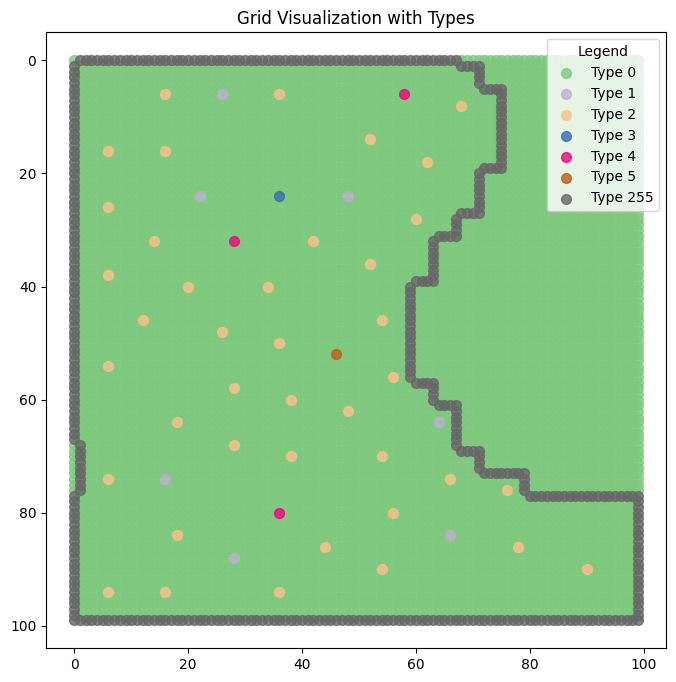

In [24]:
import random
import copy

def choose_starter_slots(grid, shrub_positions, number_of_types=3, number_of_starters=5):
    """
    Selects a number of shrub positions to be assigned as starter slots and updates the grid with new types.

    Args:
        grid (np.ndarray): The current grid representing the environment.
        shrub_positions (list): List of tuples representing the positions of shrubs on the grid.
        number_of_types (int): Number of distinct starter types. Default is 3.
        number_of_starters (int): Number of starters to select. Default is 5.

    Returns:
        np.ndarray: Updated grid with starter slots assigned.
    """
    working_grid = copy.deepcopy(grid)
    shrub_slots = copy.deepcopy(shrub_positions)
    seed_locations = {t: [] for t in range(3, 3 + number_of_types)}

    # Ensure number_of_starters does not exceed the available shrub slots
    number_of_starters = min(number_of_starters, len(shrub_slots))

    for _ in range(number_of_starters):
        random_index = random.randint(0, len(shrub_slots) - 1)
        selected_position = shrub_slots.pop(random_index)
        # Assign a random type (3, 4, or 5) to the selected position
        assigned_type = random.randint(3, 3 + number_of_types - 1)
        working_grid[selected_position[0], selected_position[1]] = assigned_type
        seed_locations[assigned_type].append(selected_position)

    return working_grid, seed_locations


import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def visualize_grid_with_types(grid, type_labels=None):
    """
    Visualize a grid with different types (e.g., Open Canopy, Intermediate Canopy) using a unique color for each type.

    Args:
        grid (np.ndarray): 2D array representing the grid. Each cell value corresponds to a type.
        type_labels (dict): Optional dictionary mapping grid values to labels, e.g., {0: "Empty", 1: "Shrub", 3: "Starter Type 1"}.
    """
    # Define a colormap for visualization
    unique_values = np.unique(grid)
    colors = plt.cm.Accent(np.linspace(0, 1, len(unique_values)))  # Use a colormap for distinct colors
    
    # Create a color map dictionary
    color_map = {val: colors[i] for i, val in enumerate(unique_values)}
    type_labels = type_labels or {val: f"Type {val}" for val in unique_values}

    # Create the plot
    plt.figure(figsize=(8, 8))
    for value, color in color_map.items():
        indices = np.argwhere(grid == value)
        plt.scatter(indices[:, 1], indices[:, 0], color=color, label=type_labels.get(value, f"Type {value}"), s=50, alpha=0.8)

    plt.gca().invert_yaxis()
    plt.title("Grid Visualization with Types")
    plt.legend(title="Legend", loc='upper right')
    plt.grid(False)
    plt.show()


final_grid = createGrid(model_path)
trees, shrubs = extract_tree_shrub_placements(final_grid)

random_points, seeds  = choose_starter_slots(final_grid, shrubs)

visualize_grid_with_types(random_points)


## Secondly create heatmap on top and use that to generate the potential radius for each point

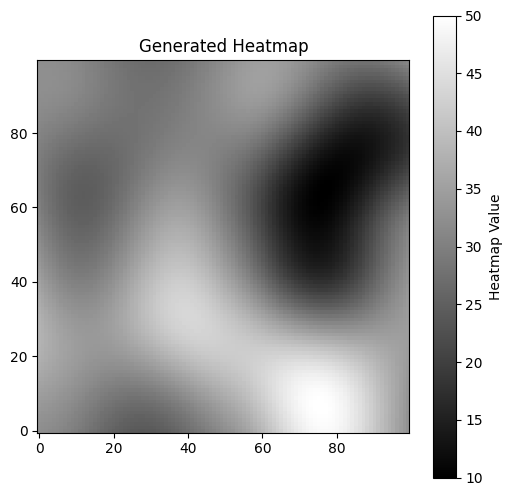

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise

def generate_heatmap(seed=None, grid_size=(100, 100), octaves=4, value_range=(10, 50), invert=False):
    """
    Generate a random heatmap using Perlin noise.

    Args:
        grid_size (tuple): The size of the heatmap (width, height).
        octaves (int): Number of octaves for the Perlin noise (controls the detail level).
        seed (int or None): Seed for reproducibility. Defaults to None.
        value_range (tuple): The range of values for the heatmap (min, max).
        invert (bool): Whether to invert the values in the heatmap.
    
    Returns:
        np.ndarray: A 2D array representing the heatmap.
    """
    # Initialize Perlin noise generator
    noise = PerlinNoise(octaves=octaves, seed=seed)

    # Generate noise values for the grid
    width, height = grid_size
    heatmap = np.array([[noise([i / height, j / width]) for j in range(width)] for i in range(height)])

    # Normalize the noise values to the desired range
    min_val, max_val = value_range
    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))  # Normalize to 0-1
    
    # Invert the heatmap if required
    if invert:
        heatmap = 1 - heatmap

    heatmap = heatmap * (max_val - min_val) + min_val  # Scale to the desired range

    return heatmap

def visualize_heatmap(heatmap):
    """
    Visualize the heatmap using Matplotlib.

    Args:
        heatmap (np.ndarray): A 2D array representing the heatmap.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(heatmap, cmap="gray", origin="lower")
    plt.colorbar(label="Heatmap Value")
    plt.title("Generated Heatmap")
    plt.show()

# Generate and visualize the heatmap
heatmap = generate_heatmap(grid_size=(100, 100), octaves=2, value_range=(10, 50), invert=True)
visualize_heatmap(heatmap)


## Find the areas that need to be calculated

Loaded model from ./models/23rd.zip
Episode finished after 392 steps


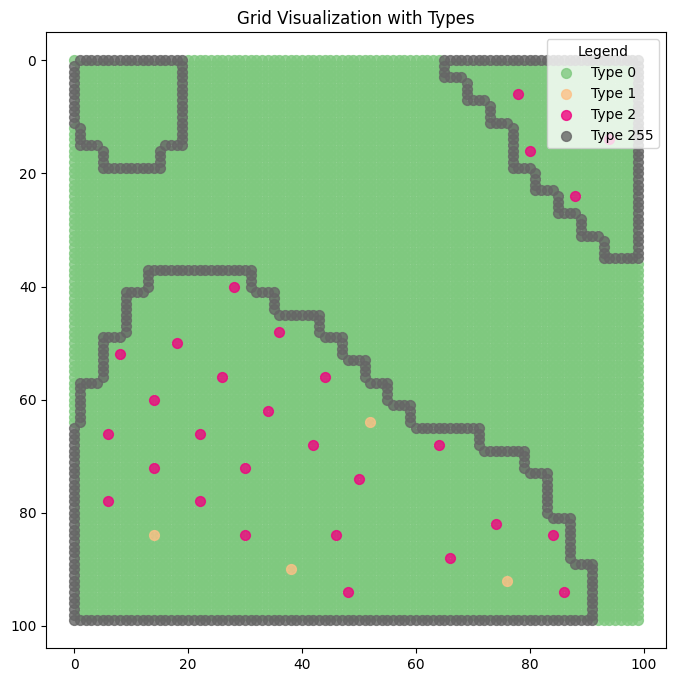

[[  0 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 [128 128 128 ... 128 128 128]
 ...
 [128 128 128 ...   0   0   0]
 [128 128 128 ...   0   0   0]
 [128 128 128 ...   0   0   0]]


In [20]:
from scipy.ndimage import binary_fill_holes

def shade_inside_border(grid, border_value=255, fill_value=128):
    """
    Shade points inside the black borders on the grid with a specified fill color,
    leaving outside regions untouched.

    Args:
        grid (np.ndarray): The grid representing the environment.
        border_value (int): Value representing the border in the grid.
        fill_value (int): Value to fill the inside regions with.

    Returns:
        np.ndarray: Modified grid with inside regions shaded with the fill color.
    """
    # Create a mask for border areas
    border_mask = grid == border_value

    # Use binary_fill_holes to fill regions inside the border
    filled_region = binary_fill_holes(border_mask)

    # Create a copy of the grid to modify
    shaded_grid = np.copy(grid)
    
    # Apply the fill color to inside regions only
    shaded_grid[filled_region] = fill_value
    # plt.imshow(shaded_grid, cmap="gray")
    # plt.title("Grid with Inside Regions Shaded")
    # plt.show()
    
    return shaded_grid


final_grid = createGrid(model_path)
visualize_grid_with_types(final_grid)
grid = shade_inside_border(final_grid)
print(grid)

## Find the areas that are under shade

Loaded model from ./models/23rd.zip
Episode finished after 687 steps


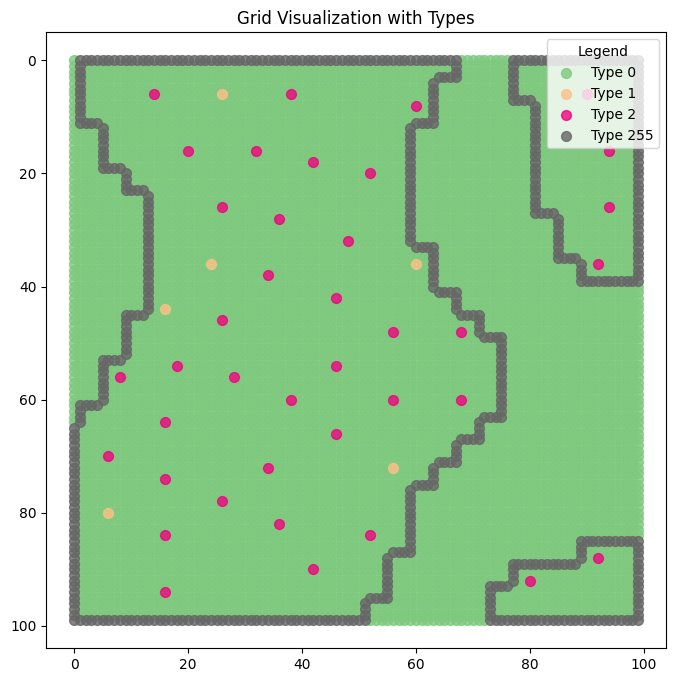

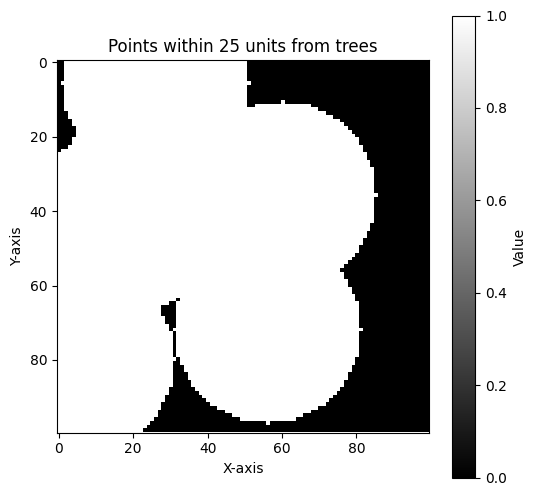

In [14]:
## simulating the shaded area
## to be replaced with querying shade area from databse in future

# assume all areas are 0, for all points that are 1 in the grid, label the points in a surrounding radius as 1 

import numpy as np
from scipy.spatial.distance import cdist

def label_near_trees(grid, tree_value=1, distance_threshold=5):
    """
    Creates a new grid where points within a given distance from a tree are labeled as 1, others as 0.

    Args:
        grid (np.ndarray): The input grid.
        tree_value (int): The value representing trees in the grid.
        distance_threshold (float): The distance threshold for labeling nearby points.

    Returns:
        np.ndarray: A new grid with points near trees labeled as 1, others as 0.
    """
    # Find the positions of trees in the grid
    tree_positions = np.argwhere(grid == tree_value)
    
    # Initialize the new grid with zeros
    new_grid = np.zeros_like(grid, dtype=np.int32)
    
    # Get all grid coordinates
    all_positions = np.array([(i, j) for i in range(grid.shape[0]) for j in range(grid.shape[1])])
    
    # Calculate the distances from all points to the tree positions
    if len(tree_positions) > 0:
        distances = cdist(all_positions, tree_positions)
        min_distances = np.min(distances, axis=1)
        
        # Mark points within the distance threshold as 1
        nearby_indices = np.where(min_distances <= distance_threshold)[0]
        for index in nearby_indices:
            i, j = all_positions[index]
            new_grid[i, j] = 1
    
    return new_grid


final_grid = createGrid(model_path)


distance_threshold = 25
new_grid = label_near_trees(final_grid, tree_value=1, distance_threshold=distance_threshold)

def visualize_binary_grid(grid, title="Binary Grid"):
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap="gray", origin="upper")
    plt.colorbar(label="Value")
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.show()


visualize_grid_with_types(final_grid)
visualize_binary_grid(new_grid, title=f"Points within {distance_threshold} units from trees")


# Compile all the information together

In [ ]:
def the_everything(visualise=False):
    ##
    grid = createGrid(model_path)
    trees, shrubs = extract_tree_shrub_placements(grid)

    random_points, seeds = choose_starter_slots(grid, shrubs)
    heatmap = generate_heatmap(grid_size=(100, 100), octaves=2, value_range=(30, 50), invert=True)
    plantable_grid = shade_inside_border(grid)
    # To be replaced with a proper tree radius retrival system once PoC is done
    distance_threshold = 25
    nearTree_grid = label_near_trees(grid, tree_value=1, distance_threshold=distance_threshold)
    if visualise:
        print(seeds)
        visualize_grid_with_types(grid)
        visualize_grid_with_types(random_points)
        visualize_heatmap(heatmap)
        visualize_binary_grid(plantable_grid)
        visualize_binary_grid(nearTree_grid )
    return grid, seeds , heatmap, plantable_grid, nearTree_grid, random_points

main, seeds, heatmap, plantable, nearTree_grid, random_points  = the_everything(visualise=False) 
# print(heatmap)

Loaded model from ./models/23rd.zip
Episode finished after 888 steps
[[40.99851088 40.49035981 39.97591194 ... 39.82037036 40.20145516
  40.59635704]
 [41.30166967 40.79349931 40.27880706 ... 39.83108509 40.21244618
  40.60744266]
 [41.59710333 41.08902832 40.57421004 ... 39.8453566  40.22692247
  40.62192076]
 ...
 [40.79095927 40.55624824 40.31588893 ... 42.57225243 42.12897512
  41.69465254]
 [40.84850987 40.61381775 40.37344183 ... 42.49122552 42.04696614
  41.6117641 ]
 [40.91976555 40.68507888 40.44468447 ... 42.40239383 41.95764294
  41.52205958]]


## Generating probability,
Takses the information provided in the everything, ie the seeds, heightmap and nearTree_grid to calculate probabilities for each type present in the seeds across the grid

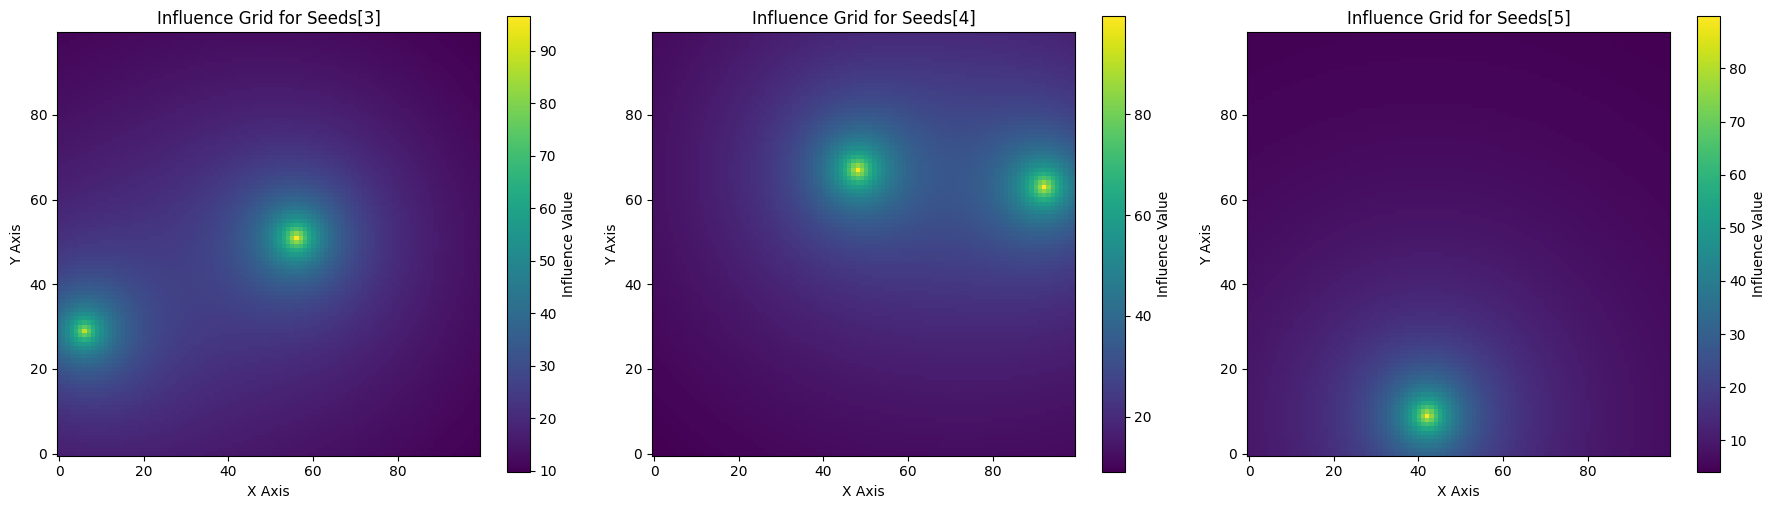

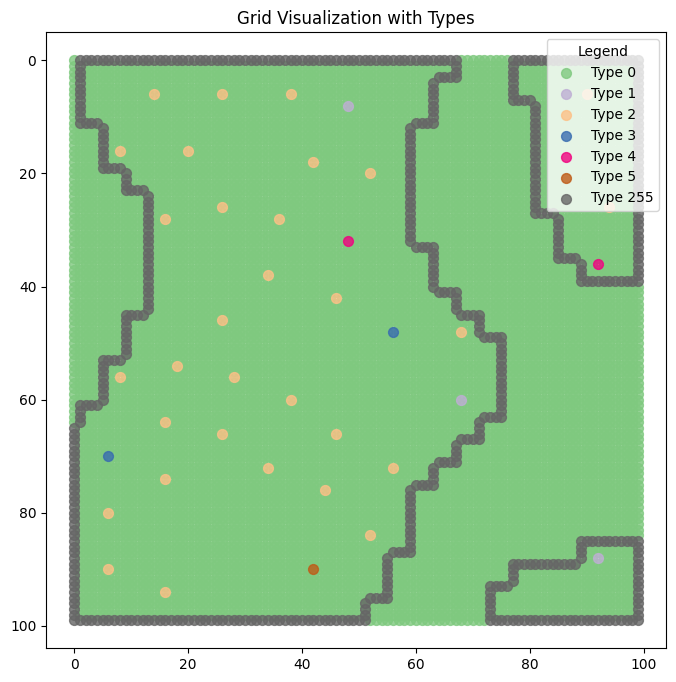

In [143]:
def generate_influence_grid_plant_type(height_map, seeds, grid_size=(100, 100), decay_rate=0.2):
    """
    Generate an influence grid based on a height map and seed positions.
    Influence decreases radially outward from the seed values.

    Args:
        height_map (np.ndarray): A 2D array of float values representing the height map (e.g., values between 10 and 50).
        seeds (list of tuple): List of (x, y) coordinates for the seed positions.
        grid_size (tuple): The size of the influence grid, defaults to (100, 100).
        decay_rate (float): Controls the rate of decay; smaller values spread influence farther. Default is 0.5.

    Returns:
        np.ndarray: A 2D array representing the influence grid with influence values.
    """
    # Initialize an empty grid
    influence_grid = np.zeros(grid_size, dtype=np.float32)
    height, width = grid_size

    # Create a mesh grid of coordinates for distance calculation
    x_indices, y_indices = np.meshgrid(np.arange(width), np.arange(height))

    for seed in seeds:
        seed_y, seed_x = seed
        # Flip the y-coordinate to match visualization
        seed_y = grid_size[0] - 1 - seed_y
        
        # Get the height map value at the seed position
        seed_value = height_map[seed_y, seed_x]  

        # Calculate the distance from the seed to all other points in the grid
        distances = np.sqrt((x_indices - seed_x) ** 2 + (y_indices - seed_y) ** 2)

        # Influence decreases radially outward using a slower decay function
        influence = np.clip(seed_value / (1 + decay_rate * distances), 0, None)

        # Add the influence of this seed to the overall grid
        influence_grid += influence

    return influence_grid

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create subplots for three influence grids

# Generate and visualize influence grids for seeds[3], seeds[4], and seeds[5]
for i, seed_type in enumerate([3, 4, 5]):  # Adjust the seed types if needed
    influence_grid = generate_influence_grid_plant_type(heatmap, seeds[seed_type])
    ax = axes[i]
    
    # Plot the influence grid
    im = ax.imshow(influence_grid, cmap="viridis", origin="lower")
    
    # Add titles and turn off axes
    ax.set_title(f"Influence Grid for Seeds[{seed_type}]")
    ax.axis("on")  # Keep axes visible
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")

    # Add individual colorbars for each subplot
    cbar = plt.colorbar(im, ax=ax, orientation="vertical", shrink=0.8)
    cbar.set_label("Influence Value")

plt.tight_layout()
plt.show()


visualize_grid_with_types(random_points)



In [ ]:
def generate_random_areas():
    main_grid, seeds, heightmap, plantable_area, nearTree_grid =  the_everything()
    shaded_dict = {3: False, 4: True, 5: True}
    # for each of the spots in the plantable area that are not plantable, value 0 in the plantable spot 
    type_3_influence = generate_influence_grid_plant_type(heightmap, seeds[3])
    type_4_influence = generate_influence_grid_plant_type(heightmap, seeds[4])
    type_5_influence = generate_influence_grid_plant_type(heightmap, seeds[5])

    # for each square inside the pltable_area grid, if the value is 128, we will run the following checks,
    # - Check the relative amount of type influence from the 3 grids above
    # use the nearTree_grid to calculate the influence of the shade, adding 20% to the value according to the shaded_dict and normalising so that the probability of 3,4,5 is total 100%
    # make a copy of plantable area, then run the following calculations to figure the probability for each species of the spots, before using a rtandom function to determine the plot value based on those random distribution values
    # return the grid and visualise it
    

## Miscellaneous attemps below

Loaded model from ./models/23rd.zip
Episode finished after 822 steps
{3: [], 4: [(46, 24), (60, 8), (90, 18)], 5: [(60, 22), (48, 88)]}


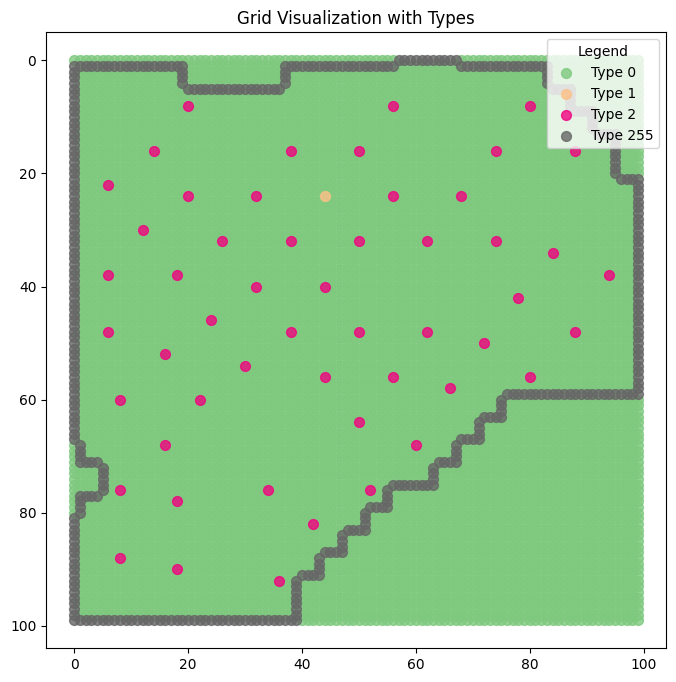

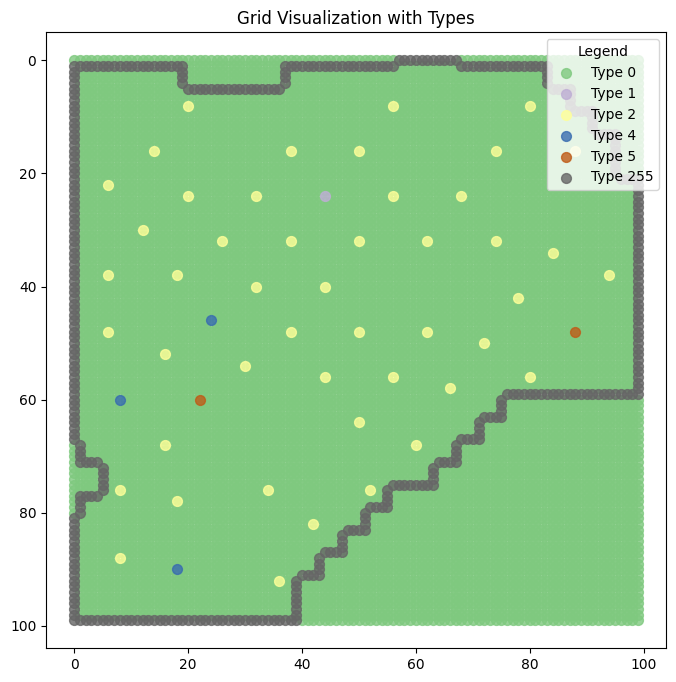

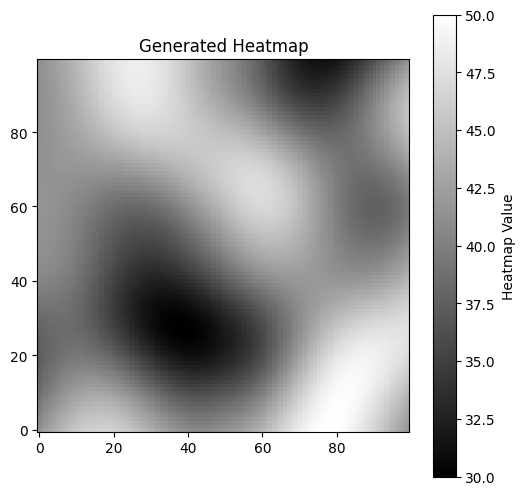

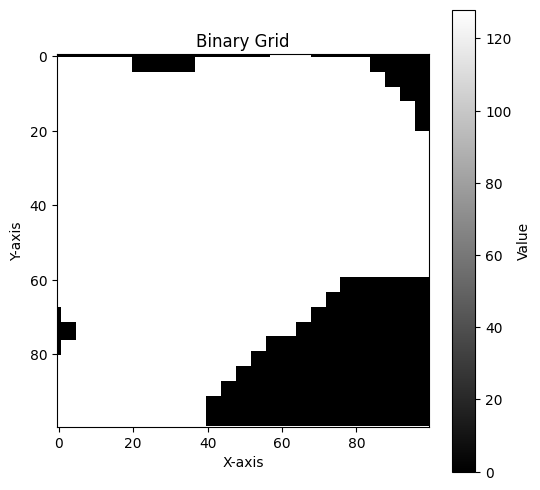

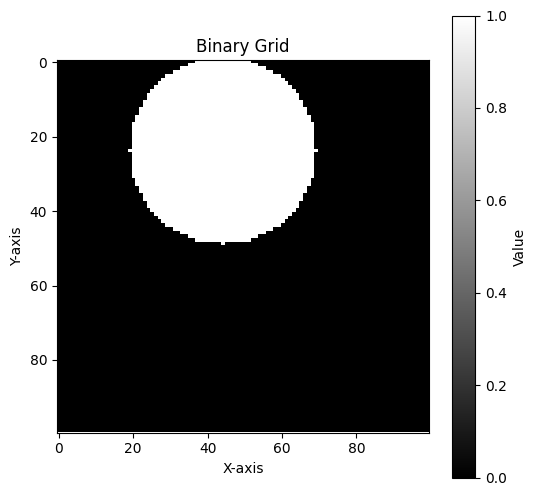

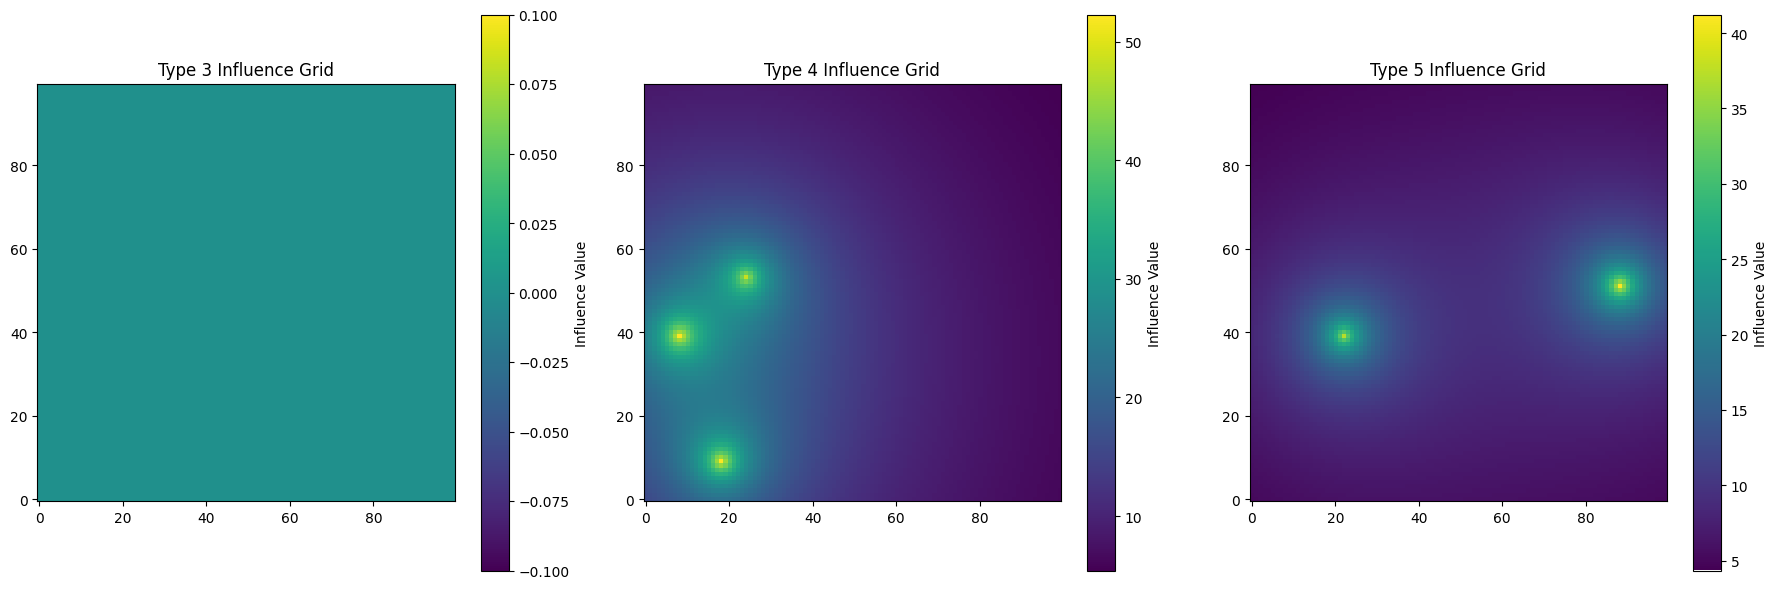

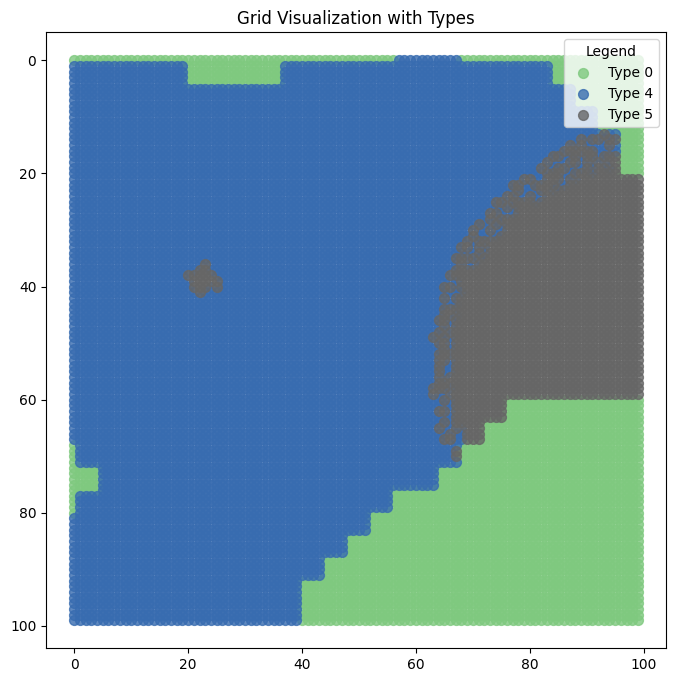

In [155]:
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_random_areas(visualize=True):
    """
    Generate a random distribution of types (3, 4, 5) within the plantable area, based on influence grids and shading.
    Optionally visualize the influence grids and the resulting randomized grid.
    """
    # Generate required grids and data
    main_grid, seeds, heightmap, plantable_area, nearTree_grid, seed_grid = the_everything(visualise=True)
    
    # Influence grids for each type
    type_3_influence = generate_influence_grid_plant_type(heightmap, seeds[3])
    type_4_influence = generate_influence_grid_plant_type(heightmap, seeds[4])
    type_5_influence = generate_influence_grid_plant_type(heightmap, seeds[5])
    
    # Shading effect dictionary
    shaded_dict = {3: False, 4: True, 5: True}  # Shade boost for types 4 and 5

    # Create a copy of the plantable area grid for random assignment
    plantable_area_copy = np.copy(plantable_area)

    # Iterate through each cell in the plantable area
    for i in range(plantable_area.shape[0]):
        for j in range(plantable_area.shape[1]):
            if plantable_area[i, j] == 128:  # If the spot is plantable
                # Calculate influence values from each type at this spot
                influence_3 = type_3_influence[i, j]
                influence_4 = type_4_influence[i, j]
                influence_5 = type_5_influence[i, j]

                # Check if the area is shaded
                is_shaded = nearTree_grid[i, j] == 1

                # Adjust influence for shaded areas
                if is_shaded:
                    influence_4 += 0.1 * influence_4 if shaded_dict[4] else 0
                    influence_5 += 0.1 * influence_5 if shaded_dict[5] else 0

                # Normalize the probabilities to sum to 1
                total_influence = influence_3 + influence_4 + influence_5
                prob_3 = influence_3 / total_influence
                prob_4 = influence_4 / total_influence
                prob_5 = influence_5 / total_influence

                prob_3 = round(prob_3, 2)
                prob_4 = round(prob_4, 2)
                prob_5 = max(0, 1 - prob_3 - prob_4)

                if prob_3 > 0.51:
                    random_type = 3
                elif prob_4 > 0.51:
                    random_type = 4
                elif prob_5 > 0.51:
                    random_type = 5
                else:
                    # Otherwise, randomly select the type based on probabilities
                    random_type = np.random.choice([3, 4, 5], p=[prob_3, prob_4, prob_5])

                # Assign the type to the plantable area copy
                plantable_area_copy[i, j] = random_type

    # Visualize the influence grids and the resulting randomized grid, if requested
    if visualize:
        # Visualize influence grids
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        influence_grids = [type_3_influence, type_4_influence, type_5_influence]
        titles = ["Type 3 Influence Grid", "Type 4 Influence Grid", "Type 5 Influence Grid"]

        for ax, influence_grid, title in zip(axes, influence_grids, titles):
            im = ax.imshow(influence_grid, cmap="viridis", origin="lower")
            ax.set_title(title)
            plt.colorbar(im, ax=ax, orientation="vertical", label="Influence Value")

        plt.tight_layout()
        plt.show()

    return plantable_area_copy

# Generate and visualize the areas
randomized_grid = generate_random_areas()
visualize_grid_with_types(randomized_grid)


Loaded model from ./models/23rd.zip
Episode finished after 635 steps


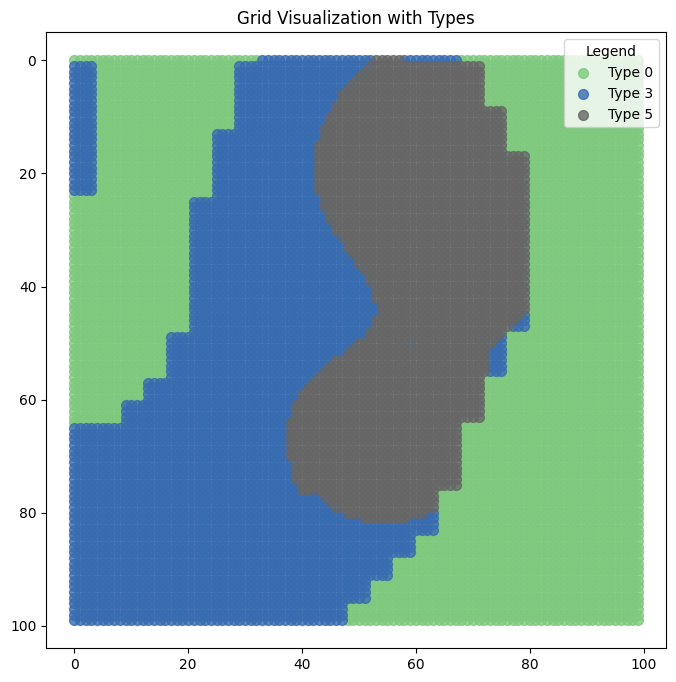

In [163]:
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_random_areas(visualize=False):
    """
    Generate a random distribution of types (3, 4, 5) within the plantable area, based on influence grids and shading.
    Optionally visualize the influence grids and the resulting randomized grid.
    """
    # Generate required grids and data
    main_grid, seeds, heightmap, plantable_area, nearTree_grid, seed_grid = the_everything(visualise=False)
    
    # Influence grids for each type
    type_3_influence = generate_influence_grid_plant_type(heightmap, seeds[3])
    type_4_influence = generate_influence_grid_plant_type(heightmap, seeds[4])
    type_5_influence = generate_influence_grid_plant_type(heightmap, seeds[5])
    
    # Shading effect dictionary
    shaded_dict = {3: False, 4: True, 5: True}  # Shade boost for types 4 and 5

    # Create a copy of the plantable area grid for random assignment
    plantable_area_copy = np.copy(plantable_area)

    # Iterate through each cell in the plantable area
    for i in range(plantable_area.shape[0]):
        for j in range(plantable_area.shape[1]):
            if plantable_area[i, j] == 128:  # If the spot is plantable
                # Calculate influence values from each type at this spot
                influence_3 = type_3_influence[i, j]
                influence_4 = type_4_influence[i, j]
                influence_5 = type_5_influence[i, j]

                # Check if the area is shaded
                is_shaded = nearTree_grid[i, j] == 1

                # Adjust influence for shaded areas
                if is_shaded:
                    influence_4 += 0.1 * influence_4 if shaded_dict[4] else 0
                    influence_5 += 0.1 * influence_5 if shaded_dict[5] else 0

                # Find the maximum influence and assign the corresponding type
                max_influence = max(influence_3, influence_4, influence_5)
                if max_influence == influence_3:
                    random_type = 3
                elif max_influence == influence_4:
                    random_type = 4
                else:
                    random_type = 5

                # Assign the type to the plantable area copy
                plantable_area_copy[i, j] = random_type

    # Visualize the influence grids and the resulting randomized grid, if requested
    if visualize:
        # Visualize influence grids
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        influence_grids = [type_3_influence, type_4_influence, type_5_influence]
        titles = ["Type 3 Influence Grid", "Type 4 Influence Grid", "Type 5 Influence Grid"]

        for ax, influence_grid, title in zip(axes, influence_grids, titles):
            im = ax.imshow(influence_grid, cmap="viridis", origin="lower")
            ax.set_title(title)
            plt.colorbar(im, ax=ax, orientation="vertical", label="Influence Value")

        plt.tight_layout()
        plt.show()

    return plantable_area_copy

# Generate and visualize the areas
randomized_grid = generate_random_areas()
visualize_grid_with_types(randomized_grid)


Loaded model from ./models/23rd.zip
Episode finished after 946 steps


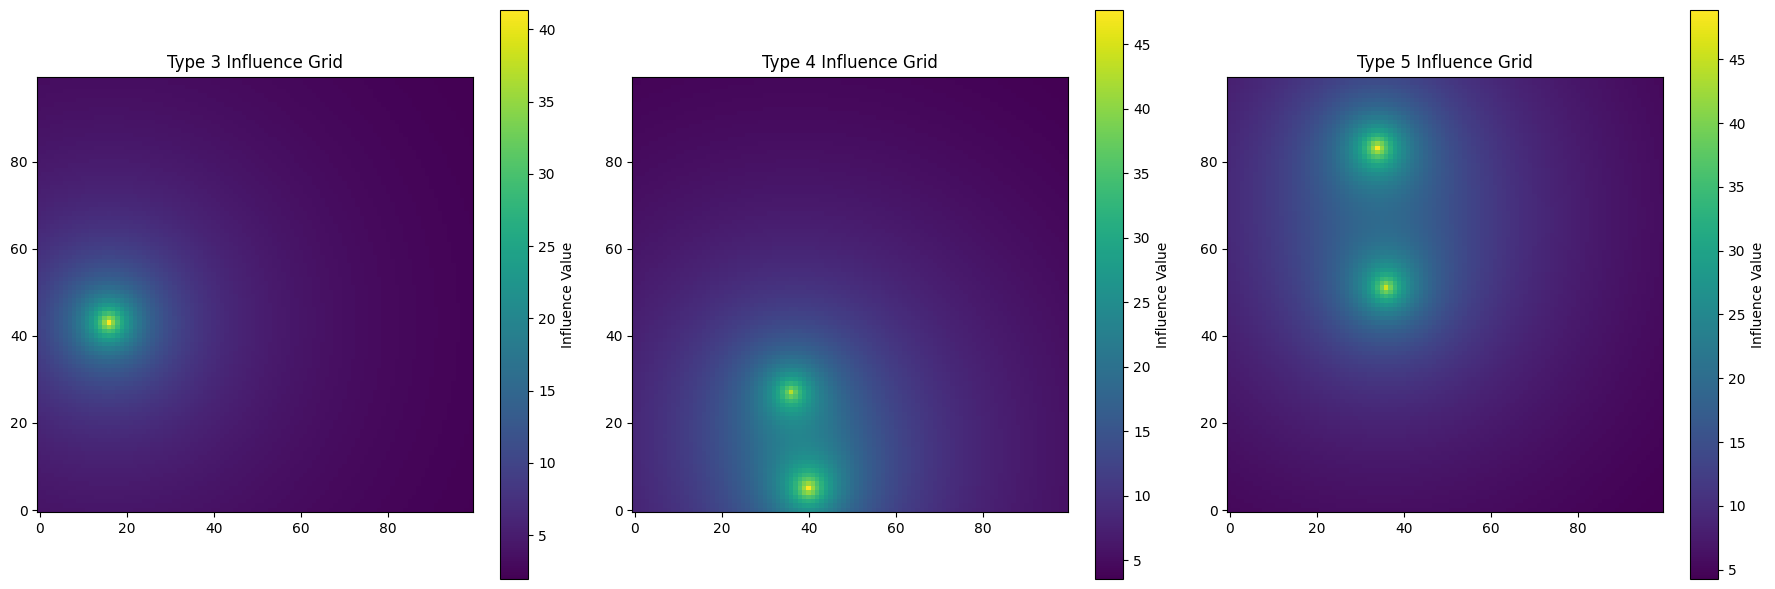

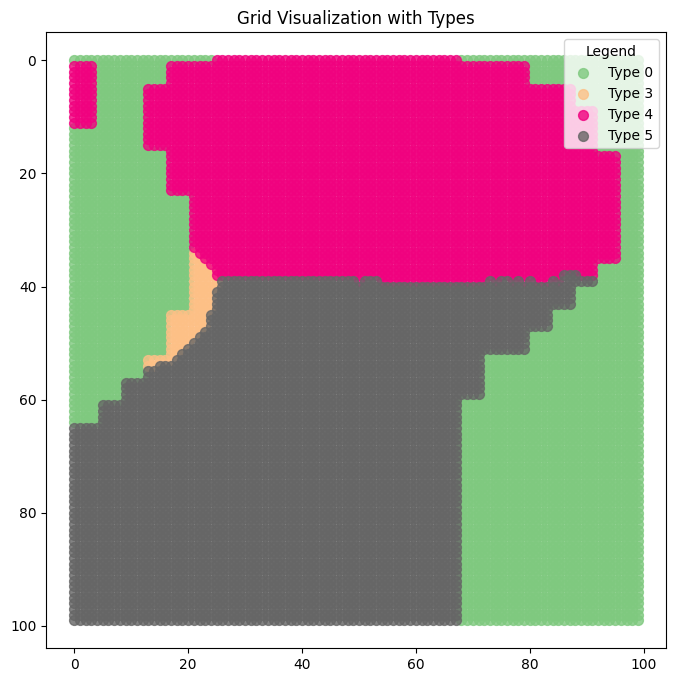

In [174]:
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_random_areas(visualize=True, threshold=0.05):
    """
    Generate a random distribution of types (3, 4, 5) within the plantable area, based on influence grids and shading.
    If the influence values are very close (difference < threshold), decide randomly.

    Args:
        visualize (bool): Whether to visualize the grids.
        threshold (float): The maximum difference between influences to trigger random selection.

    Returns:
        np.ndarray: A grid with the randomized types assigned to plantable areas.
    """
    # Generate required grids and data
    main_grid, seeds, heightmap, plantable_area, nearTree_grid, seed_grid = the_everything(visualise=False)
    
    # Influence grids for each type
    type_3_influence = generate_influence_grid_plant_type(heightmap, seeds[3])
    type_4_influence = generate_influence_grid_plant_type(heightmap, seeds[4])
    type_5_influence = generate_influence_grid_plant_type(heightmap, seeds[5])
    
    # Shading effect dictionary
    shaded_dict = {3: False, 4: True, 5: True}  # Shade boost for types 4 and 5

    # Create a copy of the plantable area grid for random assignment
    plantable_area_copy = np.copy(plantable_area)

    # Iterate through each cell in the plantable area
    for i in range(plantable_area.shape[0]):
        for j in range(plantable_area.shape[1]):
            if plantable_area[i, j] == 128:  # If the spot is plantable
                # Calculate influence values from each type at this spot
                influence_3 = type_3_influence[i, j]
                influence_4 = type_4_influence[i, j]
                influence_5 = type_5_influence[i, j]

                # Check if the area is shaded
                is_shaded = nearTree_grid[i, j] == 1

                # Adjust influence for shaded areas
                if is_shaded:
                    influence_4 += 0.1 * influence_4 if shaded_dict[4] else 0
                    influence_5 += 0.1 * influence_5 if shaded_dict[5] else 0

                # Sort influence values with their corresponding types
                influences = [(influence_3, 3), (influence_4, 4), (influence_5, 5)]
                influences.sort(reverse=True, key=lambda x: x[0])  # Sort by influence value

                # Decide based on the difference between top two influences
                if abs(influences[0][0] - influences[1][0]) < threshold:
                    # Randomly select between the top two types
                    random_type = random.choice([influences[0][1], influences[1][1]])
                else:
                    # Select the type with the highest influence
                    random_type = influences[0][1]

                # Assign the type to the plantable area copy
                plantable_area_copy[i, j] = random_type

    # Visualize the influence grids and the resulting randomized grid, if requested
    if visualize:
        # Visualize influence grids
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        influence_grids = [type_3_influence, type_4_influence, type_5_influence]
        titles = ["Type 3 Influence Grid", "Type 4 Influence Grid", "Type 5 Influence Grid"]

        for ax, influence_grid, title in zip(axes, influence_grids, titles):
            im = ax.imshow(influence_grid, cmap="viridis", origin="lower")
            ax.set_title(title)
            plt.colorbar(im, ax=ax, orientation="vertical", label="Influence Value")

        plt.tight_layout()
        plt.show()

    return plantable_area_copy

# Generate and visualize the areas
randomized_grid = generate_random_areas(threshold=0.05)
visualize_grid_with_types(randomized_grid)


## Things to work on
- Increasing the scalability
    - Ability to easily change the number of seeds that serve as starting points
        - Changing the initial function to allow for percentages to be set and typing it back into the generating stuff funciton
    - Ability to easily change between the number of plant types provided
        - Optimisation of code to allow for x number of grids to be planted and iterated through

### Base grid function
- Used to generate the grid till I get to integrate the other code over

Loaded model from ./models/23rd.zip
Episode finished after 778 steps
Trees placed at: [(6, 50), (44, 76), (64, 12)]
Shrubs placed at: [(6, 62), (16, 28), (16, 38), (16, 48), (16, 58), (22, 66), (25, 53), (26, 30), (26, 40), (32, 62), (34, 46), (34, 74), (36, 24), (36, 34), (40, 54), (42, 64), (44, 40), (46, 26), (52, 34), (52, 60), (56, 20), (58, 42), (60, 52), (60, 68), (62, 30), (68, 22), (68, 38), (68, 60), (70, 48), (74, 6), (76, 16), (78, 40), (82, 24), (84, 8), (86, 34), (86, 46), (90, 18)]


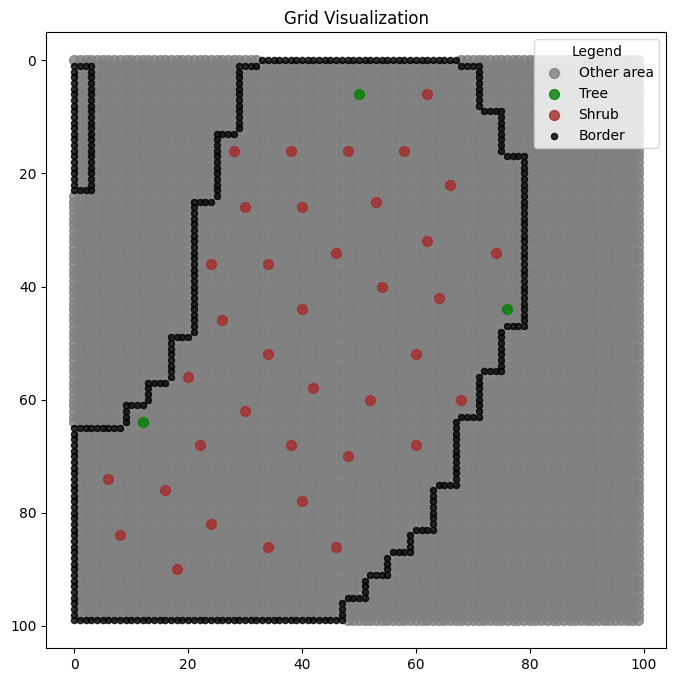

In [1]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces
import random
from perlin_noise import PerlinNoise
from scipy.spatial.distance import cdist
import cv2
import matplotlib.pyplot as plt
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.colors as mcolors
import os

# Environment Class
class customSpatialEnv(gym.Env):
    def __init__(self, octave:float, grid_size:tuple=(100,100)):
        """
        Args:
            octave (float): octave value from range [1-2] for perlin noise
            grid_size (tuple): (w, h) of grid, defaults to (100, 100)
        """
        super(customSpatialEnv, self).__init__()

        # Create 100x100 grid
        self.grid_size = grid_size
        self.octave = octave
        self.max_attempts = 100000  # Maximum number of attempts
        self.attempt_counter = 0  # Tracks the number of attempts

        self.grid, self.planting_coordinates, self.distances = self._create_environment()

        # Plants: 1 for Tree, 2 for Shrub, 0 for No plant (added)
        self.plants = np.array([0, 1, 2])  # [No Plant, Tree, Shrub]

        # Action space: Use Box for percentage (horizontal, vertical) and plant type (no object, shrub, tree)
        self.action_space = spaces.Box(low=0.0, high=1.0, shape=(3,), dtype=np.float32)

        # Observation space: Dict containing the grid and distances (both horizontal and vertical)
        self.observation_space = spaces.Dict({
            "horizontal_distance": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),  # Horizontal distance (left)
            "vertical_distance": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),    # Vertical distance (top)
            "tree_proportion": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),  # Proportion of trees
            "shrub_proportion": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),  # Proportion of shrubs
            "good_tree_spot": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),    # Whether the spot is good for planting a tree
            "border_score": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32)  
        })

        self.num_trees = 0
        self.num_shrubs = 0
        self.planted_tree_positions = []

    def reset(self, seed=None, options=None):
        """
        Reset the environment to its initial state.
        """
        super().reset(seed=seed)  # Ensure that we call the parent class reset for seeding

        # Recreate the environment (reinitialize grid, planting coordinates, and distances)
        self.grid, self.planting_coordinates, self.distances = self._create_environment()
        self.attempt_counter = 0

        # Start with the first planting coordinate if available, otherwise default to [0, 0] for distances
        if len(self.distances) > 0:
            initial_distances = self.distances[0]
        else:
            initial_distances = [0, 0]  # Handle case where no distances are available

        horizontal_distance, vertical_distance = initial_distances[1], initial_distances[0]

        # Ensure the distances are of type float32
        horizontal_distance = np.array([horizontal_distance], dtype=np.float32)
        vertical_distance = np.array([vertical_distance], dtype=np.float32)

        tree_proportion = np.array([0.0], dtype=np.float32)
        shrub_proportion = np.array([0.0], dtype=np.float32)
        good_tree_spot = np.array([0.0], dtype=np.float32)  # Initial boolean flag (False)
        border_score = np.array([0.0], dtype=np.float32)  # Initial boolean flag (False)

        # Initial observation
        return {
            "horizontal_distance": horizontal_distance,
            "vertical_distance": vertical_distance,
            "tree_proportion": tree_proportion,
            "shrub_proportion": shrub_proportion,
            "good_tree_spot": good_tree_spot,
            "border_score": border_score
        }, {}

    def step(self, action):
        """
        The step function takes a single action, which contains three parts:
        - action[0]: horizontal ratio (0-1).
        - action[1]: vertical ratio (0-1).
        - action[2]: plant type selector (0-1), now including No Plant.
        """

        self.attempt_counter += 1

        # Default value for reward (in case of termination due to exceeding max attempts)
        reward = 0  

        # If the number of attempts exceeds max_attempts, terminate the episode with a penalty
        if self.attempt_counter > self.max_attempts:
            reward = -50  # Apply a significant penalty for exceeding maximum attempts
            terminated = True
            return {
                "horizontal_distance": np.array([0.0], dtype=np.float32),
                "vertical_distance": np.array([0.0], dtype=np.float32),
                "tree_proportion": np.array([0.0], dtype=np.float32),
                "shrub_proportion": np.array([0.0], dtype=np.float32),
                "good_tree_spot": np.array([0.0], dtype=np.float32),
                "border_score": np.array([0.0], dtype=np.float32)
            }, reward, terminated, False, {}

        # Unpack the action
        horizontal_ratio = action[0]
        vertical_ratio = action[1]
        plant_type_selector = action[2]

        # Use the horizontal and vertical ratio to find the nearest planting coordinates
        horizontal_target = horizontal_ratio * self.grid_size[1]  # Scale to grid width
        vertical_target = vertical_ratio * self.grid_size[0]  # Scale to grid height

        # Find the closest coordinate to the generated ratio
        coord_index = np.argmin(np.sum(np.abs(self.planting_coordinates - [vertical_target, horizontal_target]), axis=1))

        # Calculate the difference between the target and the selected plantable coordinates
        selected_coord = self.planting_coordinates[coord_index]
        diff = np.linalg.norm(np.array([vertical_target, horizontal_target]) - np.array(selected_coord))

        # Penalize if the distance is greater than 0.5
        if diff > 20:
            reward = 0  # Apply a penalty for selecting a coordinate that is too far from any plantable spot
            terminated = False
            truncated = False
            return {
                "horizontal_distance": np.array([0.0], dtype=np.float32),
                "vertical_distance": np.array([0.0], dtype=np.float32),
                "tree_proportion": np.array([0.0], dtype=np.float32),
                "shrub_proportion": np.array([0.0], dtype=np.float32),
                "good_tree_spot": np.array([0.0], dtype=np.float32),
                "border_score": np.array([0.0], dtype=np.float32)
            }, reward, terminated, truncated, {}

        # Use the plant type selector to determine the plant type
        if plant_type_selector < 0.33:
            plant_type = 0  # No Plant (new option)
        elif plant_type_selector < 0.66:
            plant_type = 1  # Tree
        else:
            plant_type = 2  # Shrub

        # The rest of the planting logic if a valid spot is selected
        planting_coord = self.planting_coordinates[coord_index]

        if self.grid[planting_coord[0], planting_coord[1]] == 125:  # Plantable spot
            # Update the grid with the selected plant type (1: Tree, 2: Shrub)
            self.grid[planting_coord[0], planting_coord[1]] = self.plants[plant_type]

            if len(self.distances) > 0:  # Ensure there are distances to access
                horizontal_distance, vertical_distance = self.distances[min(coord_index, len(self.distances) - 1)]
            else:
                horizontal_distance, vertical_distance = 0.0, 0.0

            # Remove the planted coordinate from the list to avoid planting again in the same spot
            self.planting_coordinates = np.delete(self.planting_coordinates, coord_index, axis=0)
            self.distances = np.delete(self.distances, coord_index, axis=0)

            ####################################################################################
            ### Shrub Proportion and Tree proportion and reward mechanism
            #  Calculate tree and shrub proportions
            total_plants = self.num_trees + self.num_shrubs
            tree_proportion = self.num_trees / total_plants if total_plants > 0 else 0
            shrub_proportion = self.num_shrubs / total_plants if total_plants > 0 else 0
            balance_reward = 0

            # Update tree and shrub counts
            if self.plants[plant_type] == 1:
                self.num_trees += 1
                self.planted_tree_positions.append(planting_coord)  # Track tree positions
                if tree_proportion > 0.2:
                    balance_reward += 2

            elif self.plants[plant_type] == 2:
                self.num_shrubs += 1
                if shrub_proportion > 0.6:
                    balance_reward += 1

            ####################################################################################
            ### Good Tree Spot and Distance mechanism
            good_tree_spot = 1.0  # Assume the spot is good initially
            if plant_type == 1:  # Only check for trees
                for tree_pos in self.planted_tree_positions:
                    if np.array_equal(tree_pos, planting_coord):
                        continue
                    # Calculate the distance between the planted tree and all other trees
                    dist = np.linalg.norm(np.array(planting_coord) - np.array(tree_pos))
                    if dist < 50:  # If any tree is within 50 units, it's not a good spot
                        good_tree_spot = 0.0
                        break
            distance_reward = 0.5
            # Only apply reward for trees (plant_type == 1)
            if self.plants[plant_type] == 1:
                # Apply a reward based on how far the nearest tree is, capped at 50 units
                if good_tree_spot == 1.0:
                    distance_reward = 1  # Normalize reward (closer to 50 = higher reward)
                else:
                    distance_reward = 0

            ####################################################################################

            ### Border Score Segment

            # Retrieve the distances for the selected planting coordinate
            if len(self.distances) > 0:
                horizontal_distance, vertical_distance = self.distances[min(coord_index, len(self.distances) - 1)]
            else:
                horizontal_distance, vertical_distance = 0.0, 0.0

            border_score = 0
            if (abs(horizontal_distance - 0.5) + abs(vertical_distance - 0.5)) > 0.8:
                border_score = 1

            ####################################################################################

            ### Total reward Segment
            reward = 3 * balance_reward + 2 *distance_reward + border_score
            ####################################################################################

            if plant_type == 0:
            # No planting is done, but a small positive reward could be given to avoid excessive no-action use
                reward = 1

        else:
            # Penalize for trying to plant on a non-plantable spot
            reward = -1
            horizontal_distance, vertical_distance = 0.0, 0.0  # Set to zero if invalid action
            tree_proportion = self.num_trees / (self.num_trees + self.num_shrubs) if (self.num_trees + self.num_shrubs) > 0 else 0
            shrub_proportion = self.num_shrubs / (self.num_trees + self.num_shrubs) if (self.num_trees + self.num_shrubs) > 0 else 0
            good_tree_spot = 0.0

        # Ensure the distances are of type float32
        horizontal_distance = np.array([horizontal_distance], dtype=np.float32)
        vertical_distance = np.array([vertical_distance], dtype=np.float32)
        tree_proportion = np.array([tree_proportion], dtype=np.float32)
        shrub_proportion = np.array([shrub_proportion], dtype=np.float32)
        good_tree_spot = np.array([good_tree_spot], dtype=np.float32)
        border_score = np.array([border_score], dtype=np.float32)

        # Observation: the current state of the environment (grid, distances, and tree/shrub proportions)
        observation = {
            "horizontal_distance": horizontal_distance,
            "vertical_distance": vertical_distance,
            "tree_proportion": tree_proportion,
            "shrub_proportion": shrub_proportion,
            "good_tree_spot": good_tree_spot,
            "border_score": border_score
        }

        # Check if the episode should end (plant all possible spots)
        terminated = len(self.planting_coordinates) == 0

        # Truncated remains False
        truncated = False

        info = {
            'diff': diff  # Add diff to the info dictionary
        }

        return observation, reward, terminated, truncated, info


    def _create_environment(self):
        """
        Function to create a test environment
        Runs perlin noise, dithers
        Ensure that at least 7.5% is plantable
        Filters to ensure minimum 10 grid between all coordinates

        Returns:
            planting_grid (np.ndarray): self.grid_size grid of 0 for unplantable and 1 for plantable
            planting_coord (np.ndarray): (1, num_planting_coord) numpy array
        """ 
        while True:
            noise = PerlinNoise(octaves=self.octave, seed = random.randint(0, 50))
            width, height = self.grid_size

            # Create environment and dither
            perlin_env = np.array([[noise([i/height, j/width]) for j in range(width)] for i in range(height)])
            dithered_perlin_env = self._dither_environment(perlin_env)

            # Check density, more than 7.5% must be plantable
            planting_positions = np.argwhere(dithered_perlin_env == 1)
            planting_density = len(planting_positions) / len(dithered_perlin_env.flatten())

            # If planting density too low, recreate environment with a random grid
            if planting_density > 7.5/100:
                break

        planting_grid, planting_coords  = self._filter_environment(planting_positions)
        boundary = self._draw_and_return_boundary_only(dithered_perlin_env) #just remember to change the input accordingly
        distances, final_grid = self._create_distance_list_grid(planting_grid, boundary, planting_coords)

        return final_grid, planting_coords, distances

    def _dither_environment(self, perlin_env:np.ndarray):
        """
        Function to dither perlin environment using bayer matrix
        
        Args:
            perlin_env (np.ndarray): self.grid_size numpy array with random noise from perlin

        Returns:
            dithered_grid (np.ndarray): self.grid_size grid of 0 for unplantable and 1 for plantable
        """
        # 4x4 Normalised Bayer matrix
        bayer_matrix = np.array([
            [0, 8, 2, 10],
            [12, 4, 14, 6],
            [3, 11, 1, 9],
            [15, 7, 13, 5]
        ]) / 16.0  # Normalisation

        # Dither with Bayer Matrix
        bayer_tile_size = bayer_matrix.shape[0]  # Size of the Bayer matrix (4x4)
        dithered_grid = np.zeros_like(perlin_env)
        width, height = self.grid_size

        # Apply Bayer matrix
        for y in range(height):
            for x in range(width):
                bayer_value = bayer_matrix[y % bayer_tile_size, x % bayer_tile_size]
                dithered_grid[y, x] = 1 if perlin_env[y, x] > bayer_value else 0
        
        return dithered_grid

    def _filter_environment(self, planting_positions:np.ndarray):
        """
        Function to remove close coordinates, ensuring all coordinates are at least 10 apart
        All coordinates within 5 grid of the environment borders are also remove as a buffer effect
        
        Args:
            planting_positions (np.ndarray): numpy array of all plantable coordinates from dithering algorithm

        Returns:
            final_grid (np.ndarray): self.grid_size grid of 0 for unplantable and 1 for plantable
            final_planting_coordinates (np.ndarray): (1, num_planting_coord) numpy array        
        """
        min_distance = 10
        filtered_planting_positions = planting_positions.copy()
        
        # Calculate elucidean distance between coordinates
        distances = cdist(filtered_planting_positions, filtered_planting_positions)

        # Keep a numpy array of all filtered position and assume is true
        keep_array = np.ones(len(filtered_planting_positions), dtype=bool)

        # Check for points that are too close
        for i in range(len(filtered_planting_positions)):
            plant_coordinate = filtered_planting_positions[i]
            # Boundary of 5 pixel to prevent tress on the edge
            if plant_coordinate[0] <= 5 or plant_coordinate[0] >= (self.grid_size[0] -5):
                keep_array[i] = False
            
            if plant_coordinate[1] <= 5 or plant_coordinate[1] >= (self.grid_size[1] -5):
                keep_array[i] = False

            # Only consider points that haven't been removed
            if keep_array[i]:  
                for j in range(i + 1, len(filtered_planting_positions)):
                    if distances[i, j] < min_distance:
                        # Remove the second point if it's too close
                        keep_array[j] = False


        final_planting_coordinates = filtered_planting_positions[keep_array]
        # Final grid (All 0s)
        final_grid = np.zeros(self.grid_size)
        # Update grid with planting position
        for coordinates in final_planting_coordinates:
            final_grid[coordinates[0], coordinates[1]] = 1
        return final_grid, final_planting_coordinates

    def _draw_and_return_boundary_only(self, input_grid, threshold_value=128, contour_value=255, dilation_iterations=3):
        '''
        Draws a precise boundary around all yellow regions in the unfiltered grid and returns an array with only the boundary values.
        
        Parameters:
        - threshold_value: int -- the threshold value to segment the yellow area (default: 128).
        - contour_value: int -- the value to set for the boundary pixels in the array (default: 255 for white).
        - dilation_iterations: int -- number of iterations for dilating the image to smooth out the areas (default: 3).
        
        Returns:
        - boundary_array: np.array -- the NumPy array containing only the boundary values.
        '''
        
        # Access the unfiltered grid from the environment
        unfiltered_grid = input_grid
        # Normalize the array to the range 0-255 (assuming it's a float array in range 0-1)
        normalized_image = (unfiltered_grid * 255).astype(np.uint8)

        # Apply a threshold to isolate the yellow area
        _, thresh = cv2.threshold(normalized_image, threshold_value, 255, cv2.THRESH_BINARY)

        # Optionally dilate the thresholded image to fill in gaps in the contours
        if dilation_iterations > 0:
            kernel = np.ones((3, 3), np.uint8)
            thresh = cv2.dilate(thresh, kernel, iterations=dilation_iterations)

        # Find contours on the thresholded image (we only want external contours)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Create an empty array (same shape as normalized_image) to store only the boundary
        boundary_array = np.zeros_like(normalized_image)

        # Draw the contours on the boundary array (without the original regions, only the contours)
        cv2.drawContours(boundary_array, contours, -1, contour_value, thickness=1)

        # Optionally show the boundary array for visualization (you can remove this for efficiency in the environment)
        # plt.imshow(boundary_array, cmap='gray')
        # plt.show()

        # Return the boundary array for further use within the environment
        return boundary_array
    
    def _set_array_borders(self, arr, border_thickness = 5, value = 0):
        '''
        Sets the borders of the class's array to a specified value.
        
        Parameters:
        - border_thickness: int -- the thickness of the border to modify.
        - value: int or float -- the value to set for the borders.
        
        Modifies:
        - self.grid or any other attribute that stores the grid.
        '''
        
        # Assuming the class has a grid or unfiltered grid attribute, modify the array in place.

        # Set top and bottom borders
        arr[:border_thickness, :] = value  # Top border
        arr[-border_thickness:, :] = value  # Bottom border
        
        # Set left and right borders
        arr[:, :border_thickness] = value  # Left border
        arr[:, -border_thickness:] = value  # Right border
        
        # You can also return the modified grid if necessary
        return arr
    
    def _create_distance_list_grid(self, grid, boundary, coordinates):
        '''
        Create the list of distances of each node from the bouyndary values
        
        Parameters:
        - grid: int -- the thickness of the border to modify.
        - boundary: int or float -- the value to set for the borders.
        
        Modifies:
        - self.grid or any other attribute that stores the grid.
        '''

        directions = [
            (-1, 0),  #U
            (1, 0),  #D
            (0, -1), #L
            (0, 1)   #R
        ]

        distances = []
        testing_copy = np.copy(boundary)

        
        for coords in coordinates:
            if grid[coords[0], coords[1]] != 1:
                print("Not Seed position")
                continue

            starting_x, starting_y = coords[1], coords[0]
            testing_copy[coords[0], coords[1]] = 125

            temp_distances = []
            for x, y in directions:
                step = 0
                current_x, current_y = starting_x, starting_y
                while 0 <= current_x < self.grid_size[0] and 0 <= current_y < self.grid_size[1]:
                    step += 1
                    current_x += x
                    current_y += y
                    if boundary[current_x, current_y] == 255:
                        temp_distances.append(step)
                        break
                    if current_x == 0 or current_x == 99 or current_y == 0 or current_y == 99:
                        temp_distances.append(step)
                        break

            horizontal_distance_L = temp_distances[2]/(temp_distances[2] + temp_distances[3])
            horizontal_distance_R = temp_distances[3]/(temp_distances[2] + temp_distances[3])

            vertical_distance_D = temp_distances[1]/(temp_distances[0] + temp_distances[1])
            vertical_distance_U = temp_distances[0]/(temp_distances[0] + temp_distances[1])
            distances.append([vertical_distance_U, horizontal_distance_L])
        return distances, testing_copy

    
    
import matplotlib.patches as mpatches
    
def load_model(env):
    global model
    model = PPO("MultiInputPolicy", env, verbose=1, n_steps=2048, gamma=0.99, learning_rate=0.0003, ent_coef=0.05)
    return model

# Train the model without saving automatically
def train_model(env):
    global model
    model.learn(total_timesteps=100000)
    return model

# Function to render one episode and test the model
def render_episode(env, model):
    obs, _ = env.reset()
    step = 0
    while True:
        action, _states = model.predict(obs, deterministic=False)
        action, _states = model.predict(obs, deterministic=False)

        # Add some noise to the action to encourage exploration
        noise = np.random.normal(0, 0.1, size=action.shape)  # Adjust noise level as needed
        action += noise
        action = np.clip(action, 0, 1)
        obs, reward, terminated, truncated, info = env.step(action)
        step += 1
        diff = info.get('diff', None)  # Get the diff from the info dictionary
        # print(f"Step {step}: Reward = {reward}, Action = {action}, Diff = {diff}")

        if terminated or truncated:
            print(f"Episode finished after {step} steps")
            break

    return model

def load_pretrained_model(model_path):
    """
    Load a pretrained PPO model from a specified path.
    """
    if not os.path.exists(model_path):
        raise ValueError(f"Model path {model_path} does not exist.")
    
    model = PPO.load(model_path)
    print(f"Loaded model from {model_path}")
    return model


def generate_new_placement(env, model):
    """
    Generate a new grid and use the model to place trees, shrubs, or no plant until all plantable spots are used.
    """
    obs, _ = env.reset()
    step = 0

    while True:
        action, _states = model.predict(obs, deterministic=False)
        noise = np.random.normal(0, 0.05, size=action.shape)
        randomized_action = np.clip(action + noise, 0, 1)
        obs, reward, terminated, truncated, info = env.step(randomized_action)
        
        step += 1

        if terminated or truncated:
            print(f"Episode finished after {step} steps")
            break

    return env.grid  # Only return the grid


def extract_tree_shrub_placements(grid):
    """
    Extracts the tree and shrub placements from the final grid.
    
    Args:
        grid (np.ndarray): The final grid after placement.
    
    Returns:
        trees (list of tuple): List of coordinates of tree placements.
        shrubs (list of tuple): List of coordinates of shrub placements.
    """
    trees = list(zip(*np.where(grid == 1)))
    shrubs = list(zip(*np.where(grid == 2)))
    return trees, shrubs


# Main function to load model and generate new placement
def createGrid(model_path):
    env = customSpatialEnv(octave=1.5, grid_size=(100, 100))
    model = load_pretrained_model(model_path)
    final_grid = generate_new_placement(env, model)
    return final_grid


# Visualization (optional, for debugging)
def visualize_grid_with_circles(grid):
    plt.figure(figsize=(8, 8))
    marker_styles = {
        0: {'color': 'gray', 'label': 'Other area', 'size': 50},
        125: {'color': 'yellow', 'label': 'Plantable', 'size': 50},
        1: {'color': 'green', 'label': 'Tree', 'size': 50},
        2: {'color': 'brown', 'label': 'Shrub', 'size': 50},
        3: {'color': 'blue', 'label': 'No Plant', 'size': 50},
        255: {'color': 'black', 'label': 'Border', 'size': 20},
    }

    for value, style in marker_styles.items():
        indices = np.argwhere(grid == value)
        if len(indices) > 0:
            plt.scatter(indices[:, 1], indices[:, 0], color=style['color'], label=style['label'], s=style['size'], alpha=0.8)

    plt.gca().invert_yaxis()
    plt.legend(title="Legend", loc='upper right')
    plt.title("Grid Visualization")
    plt.grid(False)
    plt.show()


if __name__ == "__main__":
    # Specify the path to the pretrained model directory
    model_path = "./models/23rd.zip"
    final_grid = createGrid(model_path)
    trees, shrubs = extract_tree_shrub_placements(final_grid)
    print("Trees placed at:", trees)
    print("Shrubs placed at:", shrubs)

    # Optional visualization
    visualize_grid_with_circles(final_grid)


### Functions that were not change from previous iteration

- generate_heatmap (Generates perlin noise for influence)
- label_near_trees (generates hte)
- shade_inside_border (finds area that will be iterated through)
- generate_influience_grid_plant_type (used to generate the heatmap of the plants of a single type using the heatmap and the seed positions)

imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise
from scipy.spatial.distance import cdist
from scipy.ndimage import binary_fill_holes
import random
import copy

In [6]:
def generate_heatmap(seed=None, grid_size=(100, 100), octaves=4, value_range=(10, 50), invert=False):
    """
    Generate a random heatmap using Perlin noise.

    Args:
        grid_size (tuple): The size of the heatmap (width, height).
        octaves (int): Number of octaves for the Perlin noise (controls the detail level).
        seed (int or None): Seed for reproducibility. Defaults to None.
        value_range (tuple): The range of values for the heatmap (min, max).
        invert (bool): Whether to invert the values in the heatmap.
    
    Returns:
        np.ndarray: A 2D array representing the heatmap.
    """
    # Initialize Perlin noise generator
    noise = PerlinNoise(octaves=octaves, seed=seed)

    # Generate noise values for the grid
    width, height = grid_size
    heatmap = np.array([[noise([i / height, j / width]) for j in range(width)] for i in range(height)])

    # Normalize the noise values to the desired range
    min_val, max_val = value_range
    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))  # Normalize to 0-1
    
    # Invert the heatmap if required
    if invert:
        heatmap = 1 - heatmap

    heatmap = heatmap * (max_val - min_val) + min_val  # Scale to the desired range

    return heatmap

def visualize_heatmap(heatmap):
    """
    Visualize the heatmap using Matplotlib.

    Args:
        heatmap (np.ndarray): A 2D array representing the heatmap.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(heatmap, cmap="gray", origin="lower")
    plt.colorbar(label="Heatmap Value")
    plt.title("Generated Heatmap")
    plt.show()

# Generate and visualize the heatmap
heatmap = generate_heatmap(grid_size=(100, 100), octaves=2, value_range=(10, 50), invert=True)
# visualize_heatmap(heatmap)

In [7]:
def label_near_trees(grid, tree_value=1, distance_threshold=5):
    """
    Creates a new grid where points within a given distance from a tree are labeled as 1, others as 0.

    Args:
        grid (np.ndarray): The input grid.
        tree_value (int): The value representing trees in the grid.
        distance_threshold (float): The distance threshold for labeling nearby points.

    Returns:
        np.ndarray: A new grid with points near trees labeled as 1, others as 0.
    """
    # Find the positions of trees in the grid
    tree_positions = np.argwhere(grid == tree_value)
    
    # Initialize the new grid with zeros
    new_grid = np.zeros_like(grid, dtype=np.int32)
    
    # Get all grid coordinates
    all_positions = np.array([(i, j) for i in range(grid.shape[0]) for j in range(grid.shape[1])])
    
    # Calculate the distances from all points to the tree positions
    if len(tree_positions) > 0:
        distances = cdist(all_positions, tree_positions)
        min_distances = np.min(distances, axis=1)
        
        # Mark points within the distance threshold as 1
        nearby_indices = np.where(min_distances <= distance_threshold)[0]
        for index in nearby_indices:
            i, j = all_positions[index]
            new_grid[i, j] = 1
    
    return new_grid


final_grid = createGrid(model_path)


distance_threshold = 25
new_grid = label_near_trees(final_grid, tree_value=1, distance_threshold=distance_threshold)

def visualize_binary_grid(grid, title="Binary Grid"):
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap="gray", origin="upper")
    plt.colorbar(label="Value")
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.show()


# visualize_grid_with_types(final_grid)
# visualize_binary_grid(new_grid, title=f"Points within {distance_threshold} units from trees")

Loaded model from ./models/23rd.zip
Episode finished after 810 steps


Loaded model from ./models/23rd.zip
Episode finished after 715 steps


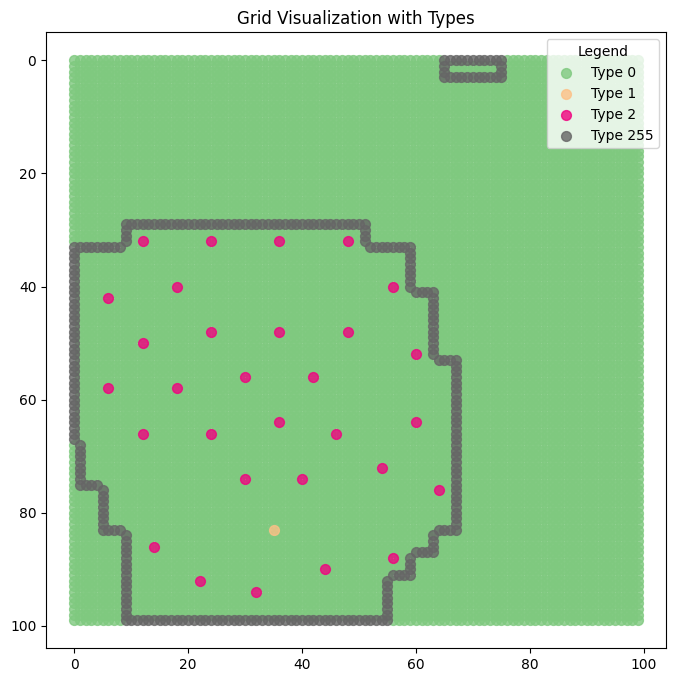

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
def shade_inside_border(grid, border_value=255, fill_value=128):
    """
    Shade points inside the black borders on the grid with a specified fill color,
    leaving outside regions untouched.

    Args:
        grid (np.ndarray): The grid representing the environment.
        border_value (int): Value representing the border in the grid.
        fill_value (int): Value to fill the inside regions with.

    Returns:
        np.ndarray: Modified grid with inside regions shaded with the fill color.
    """
    # Create a mask for border areas
    border_mask = grid == border_value

    # Use binary_fill_holes to fill regions inside the border
    filled_region = binary_fill_holes(border_mask)

    # Create a copy of the grid to modify
    shaded_grid = np.copy(grid)
    
    # Apply the fill color to inside regions only
    shaded_grid[filled_region] = fill_value
    # plt.imshow(shaded_grid, cmap="gray")
    # plt.title("Grid with Inside Regions Shaded")
    # plt.show()
    
    return shaded_grid

def visualize_grid_with_types(grid, type_labels=None):
    """
    Visualize a grid with different types (e.g., Open Canopy, Intermediate Canopy) using a unique color for each type.

    Args:
        grid (np.ndarray): 2D array representing the grid. Each cell value corresponds to a type.
        type_labels (dict): Optional dictionary mapping grid values to labels, e.g., {0: "Empty", 1: "Shrub", 3: "Starter Type 1"}.
    """
    # Define a colormap for visualization
    unique_values = np.unique(grid)
    colors = plt.cm.Accent(np.linspace(0, 1, len(unique_values)))  # Use a colormap for distinct colors
    
    # Create a color map dictionary
    color_map = {val: colors[i] for i, val in enumerate(unique_values)}
    type_labels = type_labels or {val: f"Type {val}" for val in unique_values}

    # Create the plot
    plt.figure(figsize=(8, 8))
    for value, color in color_map.items():
        indices = np.argwhere(grid == value)
        plt.scatter(indices[:, 1], indices[:, 0], color=color, label=type_labels.get(value, f"Type {value}"), s=50, alpha=0.8)

    plt.gca().invert_yaxis()
    plt.title("Grid Visualization with Types")
    plt.legend(title="Legend", loc='upper right')
    plt.grid(False)
    plt.show()



final_grid = createGrid(model_path)
visualize_grid_with_types(final_grid)
grid = shade_inside_border(final_grid)
print(grid)

### Redefining the choose_start_slots function in order to use percentage of slots for better scaling

Loaded model from ./models/23rd.zip
Episode finished after 774 steps


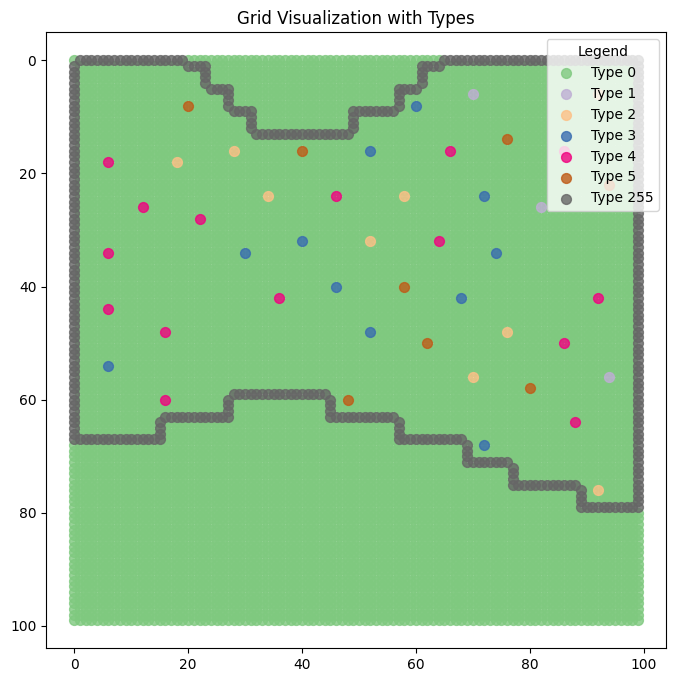

In [9]:
def choose_starter_slots(grid, shrub_positions, number_of_types=3, percentage_of_starters=0.8):
    """
    Selects a percentage of shrub positions to be assigned as starter slots and updates the grid with new types.

    Args:
        grid (np.ndarray): The current grid representing the environment.
        shrub_positions (list): List of tuples representing the positions of shrubs on the grid.
        number_of_types (int): Number of distinct starter types. Default is 3.
        percentage_of_starters (float): Percentage of shrub positions to use as starter slots. Default is 0.8 (80%).

    Returns:
        tuple: Updated grid with starter slots assigned, and a dictionary of seed locations by type.
    """
    working_grid = copy.deepcopy(grid)
    shrub_slots = copy.deepcopy(shrub_positions)
    seed_locations = {t: [] for t in range(3, 3 + number_of_types)}

    # Determine the number of starters based on the percentage
    number_of_starters = int(len(shrub_slots) * percentage_of_starters)
    number_of_starters = max(1, number_of_starters)  # Ensure at least one starter is selected

    for _ in range(number_of_starters):
        random_index = random.randint(0, len(shrub_slots) - 1)
        selected_position = shrub_slots.pop(random_index)
        # Assign a random type (3, 4, or 5) to the selected position
        assigned_type = random.randint(3, 3 + number_of_types - 1)
        working_grid[selected_position[0], selected_position[1]] = assigned_type
        seed_locations[assigned_type].append(selected_position)

    return working_grid, seed_locations


def visualize_grid_with_types(grid, type_labels=None):
    """
    Visualize a grid with different types (e.g., Open Canopy, Intermediate Canopy) using a unique color for each type.

    Args:
        grid (np.ndarray): 2D array representing the grid. Each cell value corresponds to a type.
        type_labels (dict): Optional dictionary mapping grid values to labels, e.g., {0: "Empty", 1: "Shrub", 3: "Starter Type 1"}.
    """
    # Define a colormap for visualization
    unique_values = np.unique(grid)
    colors = plt.cm.Accent(np.linspace(0, 1, len(unique_values)))  # Use a colormap for distinct colors
    
    # Create a color map dictionary
    color_map = {val: colors[i] for i, val in enumerate(unique_values)}
    type_labels = type_labels or {val: f"Type {val}" for val in unique_values}

    # Create the plot
    plt.figure(figsize=(8, 8))
    for value, color in color_map.items():
        indices = np.argwhere(grid == value)
        plt.scatter(indices[:, 1], indices[:, 0], color=color, label=type_labels.get(value, f"Type {value}"), s=50, alpha=0.8)

    plt.gca().invert_yaxis()
    plt.title("Grid Visualization with Types")
    plt.legend(title="Legend", loc='upper right')
    plt.grid(False)
    plt.show()


# Example usage
final_grid = createGrid(model_path)  # Assuming `createGrid` is defined elsewhere
trees, shrubs = extract_tree_shrub_placements(final_grid)  # Assuming `extract_tree_shrub_placements` is defined

# Use the function with a percentage of starter slots
random_points, seeds = choose_starter_slots(final_grid, shrubs, percentage_of_starters=0.8)

# Visualize the resulting grid
visualize_grid_with_types(random_points)


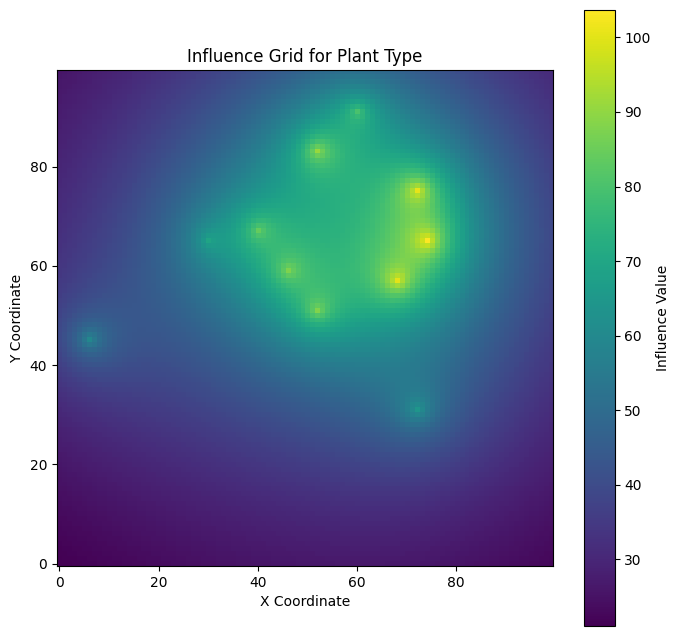

In [10]:
def generate_influence_grid_plant_type(height_map, seeds, grid_size=(100, 100), decay_rate=0.2):
    """
    Generate an influence grid based on a height map and seed positions.
    Influence decreases radially outward from the seed values.

    Args:
        height_map (np.ndarray): A 2D array of float values representing the height map (e.g., values between 10 and 50).
        seeds (list of tuple): List of (x, y) coordinates for the seed positions.
        grid_size (tuple): The size of the influence grid, defaults to (100, 100).
        decay_rate (float): Controls the rate of decay; smaller values spread influence farther. Default is 0.5.

    Returns:
        np.ndarray: A 2D array representing the influence grid with influence values.
    """
    # Initialize an empty grid
    influence_grid = np.zeros(grid_size, dtype=np.float32)
    height, width = grid_size

    # Create a mesh grid of coordinates for distance calculation
    x_indices, y_indices = np.meshgrid(np.arange(width), np.arange(height))

    for seed in seeds:
        seed_y, seed_x = seed
        # Flip the y-coordinate to match visualization
        seed_y = grid_size[0] - 1 - seed_y
        
        # Get the height map value at the seed position
        seed_value = height_map[seed_y, seed_x]  

        # Calculate the distance from the seed to all other points in the grid
        distances = np.sqrt((x_indices - seed_x) ** 2 + (y_indices - seed_y) ** 2)

        # Influence decreases radially outward using a slower decay function
        influence = np.clip(seed_value / (1 + decay_rate * distances), 0, None)

        # Add the influence of this seed to the overall grid
        influence_grid += influence

    return influence_grid

def visualize_influence_grid(influence_grid, title="Influence Grid", cmap="viridis"):
    """
    Visualize the influence grid generated by the generate_influence_grid_plant_type function.

    Args:
        influence_grid (np.ndarray): The 2D array representing the influence grid.
        title (str): Title for the visualization. Default is "Influence Grid".
        cmap (str): Colormap to use for visualization. Default is "viridis".
    """
    plt.figure(figsize=(8, 8))
    plt.imshow(influence_grid, cmap=cmap, origin="lower")
    plt.colorbar(label="Influence Value")
    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(False)
    plt.show()


# Example usage
# Assuming `height_map` and `seeds` are already defined
influence_grid = generate_influence_grid_plant_type(heatmap, seeds[3])
visualize_influence_grid(influence_grid, title="Influence Grid for Plant Type")

### Rewrapping the_everything function in order to combine with the 

In [11]:
def produce_data(percentage_shurbs=0.8, number_of_plants=3, visualise=False):
    ##
    grid = createGrid(model_path)
    trees, shrubs = extract_tree_shrub_placements(grid)

    random_points, seeds = choose_starter_slots(grid, shrubs, number_of_types=number_of_plants, percentage_of_starters=percentage_shurbs)
    heightmap = generate_heatmap(grid_size=(100, 100), octaves=2, value_range=(30, 50), invert=True)
    plantable_grid = shade_inside_border(grid)
    # To be replaced with a proper tree radius retrival system once PoC is done
    distance_threshold = 25
    nearTree_grid = label_near_trees(grid, tree_value=1, distance_threshold=distance_threshold)

    influence_grids = {}
    for index in range(number_of_plants):
        plant_index_influence_grid = generate_influence_grid_plant_type(heightmap, seeds[3 + index])
        influence_grids[index + 3] = plant_index_influence_grid
    
    shaded_dict = {plant_type: (plant_type % 2 == 0) for plant_type in range(3, 3 + number_of_plants)}


    ## Visualisation
    if visualise:
        print(seeds)
        visualize_grid_with_types(grid)
        visualize_grid_with_types(random_points)
        visualize_heatmap(heightmap)
        visualize_binary_grid(plantable_grid)
        visualize_binary_grid(nearTree_grid)
        for index in range(number_of_plants):
            visualize_influence_grid(influence_grids[index + 3])
    return grid, seeds , heightmap, plantable_grid, nearTree_grid, influence_grids, shaded_dict, random_points

main, seeds, heightmap, plantable, nearTree_grid, influence_grids, shaded_dict, random_points  = produce_data(number_of_plants=4, visualise=False) 


Loaded model from ./models/23rd.zip
Episode finished after 803 steps


### Complete function below

Loaded model from ./models/23rd.zip
Episode finished after 407 steps


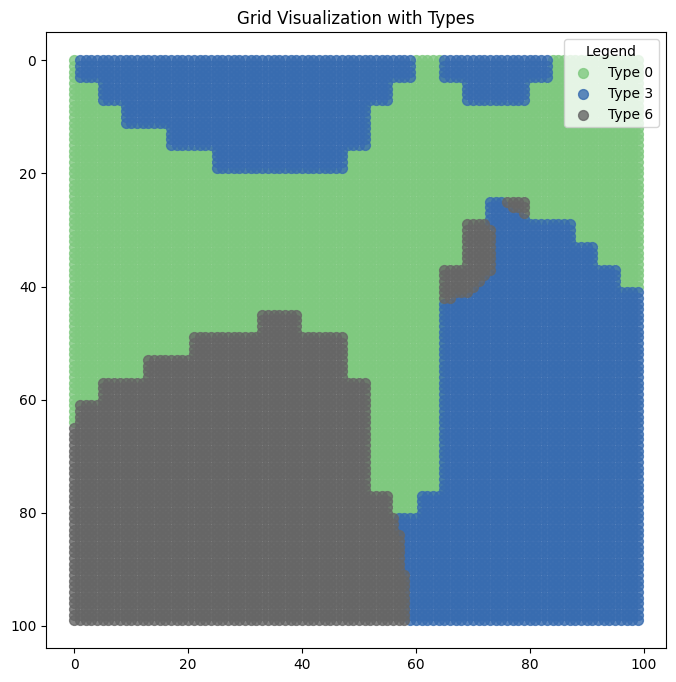

In [ ]:
def generate_random_areas_v2(number_of_plants=4, visualize=False, threshold=0.05):
    """
    Generate a random distribution of plant types within the plantable area, based on influence grids and shading.
    If the influence values are very close (difference < threshold), decide randomly.

    Args:
        number_of_plants (int): The number of plant types to consider (e.g., 3, 4, 5).
        visualize (bool): Whether to visualize the grids.
        threshold (float): The maximum difference between influences to trigger random selection.

    Returns:
        np.ndarray: A grid with the randomized types assigned to plantable areas.
    """
    # Generate required grids and data
    main_grid, seeds, heightmap, plantable_area, nearTree_grid, influence_grids, shaded_dict, random_points = produce_data(
        number_of_plants=number_of_plants, visualise=visualize
    )

    # Create a copy of the plantable area grid for random assignment
    plantable_area_copy = np.copy(plantable_area)

    # Iterate through each cell in the plantable area
    for i in range(plantable_area.shape[0]):
        for j in range(plantable_area.shape[1]):
            if plantable_area[i, j] == 128:  # If the spot is plantable
                # Calculate influence values from each type at this spot
                influences = [
                    (influence_grids[plant_type][i, j], plant_type)
                    for plant_type in range(3, 3 + number_of_plants)
                ]

                # Check if the area is shaded
                is_shaded = nearTree_grid[i, j] == 1

                # Adjust influence for shaded areas
                for idx, (influence, plant_type) in enumerate(influences):
                    if is_shaded and shaded_dict.get(plant_type, False):
                        influences[idx] = (influence + 0.1 * influence, plant_type)

                # Sort influence values with their corresponding types
                influences.sort(reverse=True, key=lambda x: x[0])  # Sort by influence value

                # Decide based on the difference between top two influences
                if abs(influences[0][0] - influences[1][0]) < threshold:
                    # Randomly select between the top two types
                    random_type = random.choice([influences[0][1], influences[1][1]])
                else:
                    # Select the type with the highest influence
                    random_type = influences[0][1]

                # Assign the type to the plantable area copy
                plantable_area_copy[i, j] = random_type


    return plantable_area_copy

# Generate and visualize the areas
randomized_grid = generate_random_areas_v2(number_of_plants=4, visualize=False, threshold=0.05)
visualize_grid_with_types(randomized_grid)


Loaded model from ./models/23rd.zip
Episode finished after 931 steps


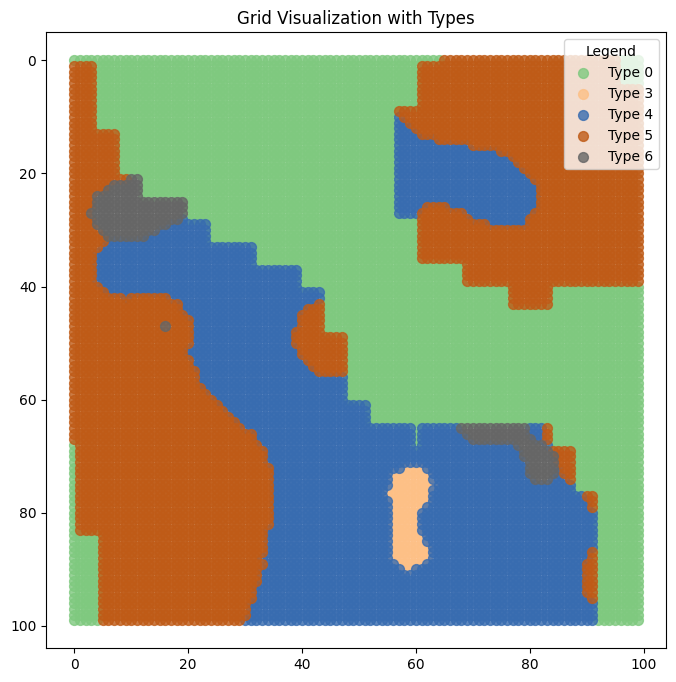

In [16]:
randomized_grid = generate_random_areas_v2(number_of_plants=4, visualize=False, threshold=0.05)
visualize_grid_with_types(randomized_grid)


## Things to be added for a V2.

Tier 1,
- Drawing Circles around the Shrub locations
- Adding variables for the following aspect
    - Seed control for grid generation
    - Proportion of seeds that are going to be used
- Experiment with Grid detection in order ot find out where to mirror for maniqured

Tier 2
- Adding an influence fromn the contour lines based on the shape of the region in conjuction to the noise, in the ratio of alpha + beta (new variables)
- Experiment with different tpyes of noise (Record the difference in results when using perlin, Worley, anymore etc.)
- Include jitter to move shrub locations that can be toggled for the sake of naturalistic planting
    - Randomly (v2 model)

Tier 3 
- Improve the algo for the jittering used in naturalistic planting
    - Algo to move it to less conjested areas 
- Figure out key allpha and beta balance values and seed proportions that can be used for naturalistic and maniqured (I suspect a higher beta and higher proportion of seeds would be beneficical for naturalistic, while a higher alpha and lower seed proportion would be similar to maniqured)

(Stretch goals )
- Trying to change the shape of the regions according to the direction of the

#### Things to be ran as background



In [18]:
# Imports so that I can see the function names lol

import numpy as np
import gymnasium as gym
from gymnasium import spaces
import random
from perlin_noise import PerlinNoise
from scipy.spatial.distance import cdist
import cv2
import matplotlib.pyplot as plt
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.colors as mcolors
import os
import copy
from scipy.ndimage import binary_fill_holes
import copy

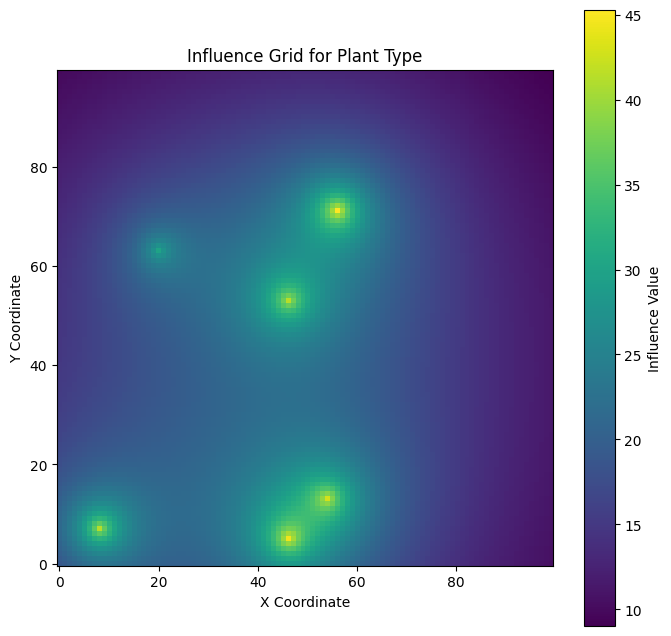

In [16]:
def generate_influence_grid_plant_type(height_map, seeds, grid_size=(100, 100), decay_rate=0.2):
    """
    Generate an influence grid based on a height map and seed positions.
    Influence decreases radially outward from the seed values.

    Args:
        height_map (np.ndarray): A 2D array of float values representing the height map (e.g., values between 10 and 50).
        seeds (list of tuple): List of (x, y) coordinates for the seed positions.
        grid_size (tuple): The size of the influence grid, defaults to (100, 100).
        decay_rate (float): Controls the rate of decay; smaller values spread influence farther. Default is 0.5.

    Returns:
        np.ndarray: A 2D array representing the influence grid with influence values.
    """
    # Initialize an empty grid
    influence_grid = np.zeros(grid_size, dtype=np.float32)
    height, width = grid_size

    # Create a mesh grid of coordinates for distance calculation
    x_indices, y_indices = np.meshgrid(np.arange(width), np.arange(height))

    for seed in seeds:
        seed_y, seed_x = seed
        # Flip the y-coordinate to match visualization
        seed_y = grid_size[0] - 1 - seed_y
        
        # Get the height map value at the seed position
        seed_value = height_map[seed_y, seed_x]  

        # Calculate the distance from the seed to all other points in the grid
        distances = np.sqrt((x_indices - seed_x) ** 2 + (y_indices - seed_y) ** 2)

        # Influence decreases radially outward using a slower decay function
        influence = np.clip(seed_value / (1 + decay_rate * distances), 0, None)

        # Add the influence of this seed to the overall grid
        influence_grid += influence

    return influence_grid

def visualize_influence_grid(influence_grid, title="Influence Grid", cmap="viridis"):
    """
    Visualize the influence grid generated by the generate_influence_grid_plant_type function.

    Args:
        influence_grid (np.ndarray): The 2D array representing the influence grid.
        title (str): Title for the visualization. Default is "Influence Grid".
        cmap (str): Colormap to use for visualization. Default is "viridis".
    """
    plt.figure(figsize=(8, 8))
    plt.imshow(influence_grid, cmap=cmap, origin="lower")
    plt.colorbar(label="Influence Value")
    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(False)
    plt.show()


# Example usage
# Assuming `height_map` and `seeds` are already defined
influence_grid = generate_influence_grid_plant_type(heatmap, seeds[3])
visualize_influence_grid(influence_grid, title="Influence Grid for Plant Type")

Loaded model from ./models/23rd.zip
Episode finished after 1155 steps


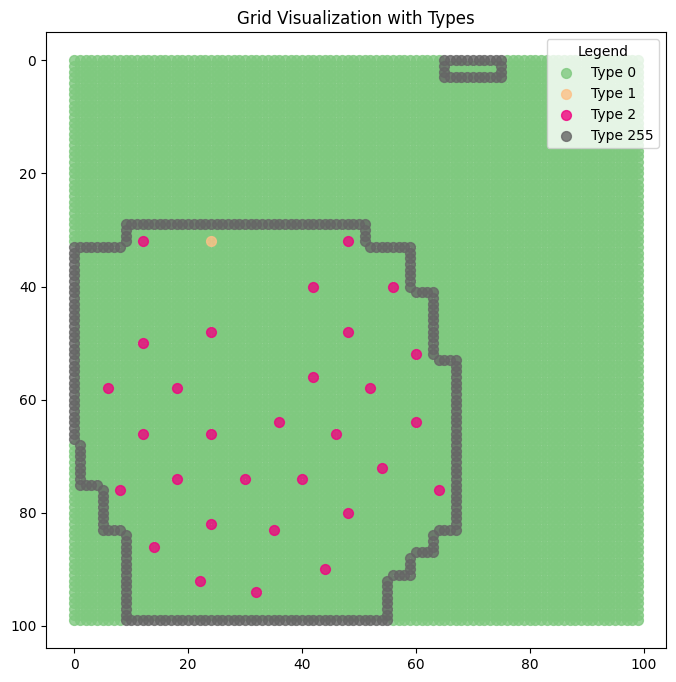

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
def shade_inside_border(grid, border_value=255, fill_value=128):
    """
    Shade points inside the black borders on the grid with a specified fill color,
    leaving outside regions untouched.

    Args:
        grid (np.ndarray): The grid representing the environment.
        border_value (int): Value representing the border in the grid.
        fill_value (int): Value to fill the inside regions with.

    Returns:
        np.ndarray: Modified grid with inside regions shaded with the fill color.
    """
    # Create a mask for border areas
    border_mask = grid == border_value

    # Use binary_fill_holes to fill regions inside the border
    filled_region = binary_fill_holes(border_mask)

    # Create a copy of the grid to modify
    shaded_grid = np.copy(grid)
    
    # Apply the fill color to inside regions only
    shaded_grid[filled_region] = fill_value
    # plt.imshow(shaded_grid, cmap="gray")
    # plt.title("Grid with Inside Regions Shaded")
    # plt.show()
    
    return shaded_grid

def visualize_grid_with_types(grid, type_labels=None):
    """
    Visualize a grid with different types (e.g., Open Canopy, Intermediate Canopy) using a unique color for each type.

    Args:
        grid (np.ndarray): 2D array representing the grid. Each cell value corresponds to a type.
        type_labels (dict): Optional dictionary mapping grid values to labels, e.g., {0: "Empty", 1: "Shrub", 3: "Starter Type 1"}.
    """
    # Define a colormap for visualization
    unique_values = np.unique(grid)
    colors = plt.cm.Accent(np.linspace(0, 1, len(unique_values)))  # Use a colormap for distinct colors
    
    # Create a color map dictionary
    color_map = {val: colors[i] for i, val in enumerate(unique_values)}
    type_labels = type_labels or {val: f"Type {val}" for val in unique_values}

    # Create the plot
    plt.figure(figsize=(8, 8))
    for value, color in color_map.items():
        indices = np.argwhere(grid == value)
        plt.scatter(indices[:, 1], indices[:, 0], color=color, label=type_labels.get(value, f"Type {value}"), s=50, alpha=0.8)

    plt.gca().invert_yaxis()
    plt.title("Grid Visualization with Types")
    plt.legend(title="Legend", loc='upper right')
    plt.grid(False)
    plt.show()



final_grid = createGrid(model_path)
visualize_grid_with_types(final_grid)
grid = shade_inside_border(final_grid)
print(grid)

In [20]:
def label_near_trees(grid, tree_value=1, distance_threshold=5):
    """
    Creates a new grid where points within a given distance from a tree are labeled as 1, others as 0.

    Args:
        grid (np.ndarray): The input grid.
        tree_value (int): The value representing trees in the grid.
        distance_threshold (float): The distance threshold for labeling nearby points.

    Returns:
        np.ndarray: A new grid with points near trees labeled as 1, others as 0.
    """
    # Find the positions of trees in the grid
    tree_positions = np.argwhere(grid == tree_value)
    
    # Initialize the new grid with zeros
    new_grid = np.zeros_like(grid, dtype=np.int32)
    
    # Get all grid coordinates
    all_positions = np.array([(i, j) for i in range(grid.shape[0]) for j in range(grid.shape[1])])
    
    # Calculate the distances from all points to the tree positions
    if len(tree_positions) > 0:
        distances = cdist(all_positions, tree_positions)
        min_distances = np.min(distances, axis=1)
        
        # Mark points within the distance threshold as 1
        nearby_indices = np.where(min_distances <= distance_threshold)[0]
        for index in nearby_indices:
            i, j = all_positions[index]
            new_grid[i, j] = 1
    
    return new_grid


final_grid = createGrid(model_path)


distance_threshold = 25
new_grid = label_near_trees(final_grid, tree_value=1, distance_threshold=distance_threshold)

def visualize_binary_grid(grid, title="Binary Grid"):
    plt.figure(figsize=(6, 6))
    plt.imshow(grid, cmap="gray", origin="upper")
    plt.colorbar(label="Value")
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.show()


# visualize_grid_with_types(final_grid)
# visualize_binary_grid(new_grid, title=f"Points within {distance_threshold} units from trees")

Loaded model from ./models/23rd.zip
Episode finished after 457 steps


## Rewriting the Grid Creation function to take a seed value

Honestly, I could probably have went to use wx code cause that would have more longevity but haha

In [6]:
class customSpatialEnv(gym.Env):
    def __init__(self, octave: float, grid_size: tuple = (100, 100), seed: int = None):
            """
            Args:
                octave (float): octave value from range [1-2] for Perlin noise.
                grid_size (tuple): (width, height) of the grid, defaults to (100, 100).
                seed (int): Random seed for reproducibility, defaults to None.
            """
            super(customSpatialEnv, self).__init__()
            self.seed_value = seed
            self.random_state = np.random.RandomState(seed)  # Controlled randomness
            self.grid_size = grid_size
            self.octave = octave
            self.max_attempts = 100000  # Maximum number of attempts
            self.attempt_counter = 0  # Tracks the number of attempts

            self.grid, self.planting_coordinates, self.distances = self._create_environment()

            # Plants: 1 for Tree, 2 for Shrub, 0 for No plant (added)
            self.plants = np.array([0, 1, 2])  # [No Plant, Tree, Shrub]

            # Action space: Use Box for percentage (horizontal, vertical) and plant type (no object, shrub, tree)
            self.action_space = spaces.Box(low=0.0, high=1.0, shape=(3,), dtype=np.float32)

            # Observation space: Dict containing the grid and distances (both horizontal and vertical)
            self.observation_space = spaces.Dict({
                "horizontal_distance": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),  # Horizontal distance (left)
                "vertical_distance": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),    # Vertical distance (top)
                "tree_proportion": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),  # Proportion of trees
                "shrub_proportion": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),  # Proportion of shrubs
                "good_tree_spot": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32),    # Whether the spot is good for planting a tree
                "border_score": spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32)  
            })

            self.num_trees = 0
            self.num_shrubs = 0
            self.planted_tree_positions = []

    def reset(self, seed=None, options=None):
        """
        Reset the environment to its initial state.
        """
        super().reset(seed=seed)  # Ensure that we call the parent class reset for seeding

        # Recreate the environment (reinitialize grid, planting coordinates, and distances)
        self.grid, self.planting_coordinates, self.distances = self._create_environment()
        self.attempt_counter = 0

        # Start with the first planting coordinate if available, otherwise default to [0, 0] for distances
        if len(self.distances) > 0:
            initial_distances = self.distances[0]
        else:
            initial_distances = [0, 0]  # Handle case where no distances are available

        horizontal_distance, vertical_distance = initial_distances[1], initial_distances[0]

        # Ensure the distances are of type float32
        horizontal_distance = np.array([horizontal_distance], dtype=np.float32)
        vertical_distance = np.array([vertical_distance], dtype=np.float32)

        tree_proportion = np.array([0.0], dtype=np.float32)
        shrub_proportion = np.array([0.0], dtype=np.float32)
        good_tree_spot = np.array([0.0], dtype=np.float32)  # Initial boolean flag (False)
        border_score = np.array([0.0], dtype=np.float32)  # Initial boolean flag (False)

        # Initial observation
        return {
            "horizontal_distance": horizontal_distance,
            "vertical_distance": vertical_distance,
            "tree_proportion": tree_proportion,
            "shrub_proportion": shrub_proportion,
            "good_tree_spot": good_tree_spot,
            "border_score": border_score
        }, {}

    def step(self, action):
        """
        The step function takes a single action, which contains three parts:
        - action[0]: horizontal ratio (0-1).
        - action[1]: vertical ratio (0-1).
        - action[2]: plant type selector (0-1), now including No Plant.
        """

        self.attempt_counter += 1

        # Default value for reward (in case of termination due to exceeding max attempts)
        reward = 0  

        # If the number of attempts exceeds max_attempts, terminate the episode with a penalty
        if self.attempt_counter > self.max_attempts:
            reward = -50  # Apply a significant penalty for exceeding maximum attempts
            terminated = True
            return {
                "horizontal_distance": np.array([0.0], dtype=np.float32),
                "vertical_distance": np.array([0.0], dtype=np.float32),
                "tree_proportion": np.array([0.0], dtype=np.float32),
                "shrub_proportion": np.array([0.0], dtype=np.float32),
                "good_tree_spot": np.array([0.0], dtype=np.float32),
                "border_score": np.array([0.0], dtype=np.float32)
            }, reward, terminated, False, {}

        # Unpack the action
        horizontal_ratio = action[0]
        vertical_ratio = action[1]
        plant_type_selector = action[2]

        # Use the horizontal and vertical ratio to find the nearest planting coordinates
        horizontal_target = horizontal_ratio * self.grid_size[1]  # Scale to grid width
        vertical_target = vertical_ratio * self.grid_size[0]  # Scale to grid height

        # Find the closest coordinate to the generated ratio
        coord_index = np.argmin(np.sum(np.abs(self.planting_coordinates - [vertical_target, horizontal_target]), axis=1))

        # Calculate the difference between the target and the selected plantable coordinates
        selected_coord = self.planting_coordinates[coord_index]
        diff = np.linalg.norm(np.array([vertical_target, horizontal_target]) - np.array(selected_coord))

        # Penalize if the distance is greater than 0.5
        if diff > 20:
            reward = 0  # Apply a penalty for selecting a coordinate that is too far from any plantable spot
            terminated = False
            truncated = False
            return {
                "horizontal_distance": np.array([0.0], dtype=np.float32),
                "vertical_distance": np.array([0.0], dtype=np.float32),
                "tree_proportion": np.array([0.0], dtype=np.float32),
                "shrub_proportion": np.array([0.0], dtype=np.float32),
                "good_tree_spot": np.array([0.0], dtype=np.float32),
                "border_score": np.array([0.0], dtype=np.float32)
            }, reward, terminated, truncated, {}

        # Use the plant type selector to determine the plant type
        if plant_type_selector < 0.33:
            plant_type = 0  # No Plant (new option)
        elif plant_type_selector < 0.66:
            plant_type = 1  # Tree
        else:
            plant_type = 2  # Shrub

        # The rest of the planting logic if a valid spot is selected
        planting_coord = self.planting_coordinates[coord_index]

        if self.grid[planting_coord[0], planting_coord[1]] == 125:  # Plantable spot
            # Update the grid with the selected plant type (1: Tree, 2: Shrub)
            self.grid[planting_coord[0], planting_coord[1]] = self.plants[plant_type]

            if len(self.distances) > 0:  # Ensure there are distances to access
                horizontal_distance, vertical_distance = self.distances[min(coord_index, len(self.distances) - 1)]
            else:
                horizontal_distance, vertical_distance = 0.0, 0.0

            # Remove the planted coordinate from the list to avoid planting again in the same spot
            self.planting_coordinates = np.delete(self.planting_coordinates, coord_index, axis=0)
            self.distances = np.delete(self.distances, coord_index, axis=0)

            ####################################################################################
            ### Shrub Proportion and Tree proportion and reward mechanism
            #  Calculate tree and shrub proportions
            total_plants = self.num_trees + self.num_shrubs
            tree_proportion = self.num_trees / total_plants if total_plants > 0 else 0
            shrub_proportion = self.num_shrubs / total_plants if total_plants > 0 else 0
            balance_reward = 0

            # Update tree and shrub counts
            if self.plants[plant_type] == 1:
                self.num_trees += 1
                self.planted_tree_positions.append(planting_coord)  # Track tree positions
                if tree_proportion > 0.2:
                    balance_reward += 2

            elif self.plants[plant_type] == 2:
                self.num_shrubs += 1
                if shrub_proportion > 0.6:
                    balance_reward += 1

            ####################################################################################
            ### Good Tree Spot and Distance mechanism
            good_tree_spot = 1.0  # Assume the spot is good initially
            if plant_type == 1:  # Only check for trees
                for tree_pos in self.planted_tree_positions:
                    if np.array_equal(tree_pos, planting_coord):
                        continue
                    # Calculate the distance between the planted tree and all other trees
                    dist = np.linalg.norm(np.array(planting_coord) - np.array(tree_pos))
                    if dist < 50:  # If any tree is within 50 units, it's not a good spot
                        good_tree_spot = 0.0
                        break
            distance_reward = 0.5
            # Only apply reward for trees (plant_type == 1)
            if self.plants[plant_type] == 1:
                # Apply a reward based on how far the nearest tree is, capped at 50 units
                if good_tree_spot == 1.0:
                    distance_reward = 1  # Normalize reward (closer to 50 = higher reward)
                else:
                    distance_reward = 0

            ####################################################################################

            ### Border Score Segment

            # Retrieve the distances for the selected planting coordinate
            if len(self.distances) > 0:
                horizontal_distance, vertical_distance = self.distances[min(coord_index, len(self.distances) - 1)]
            else:
                horizontal_distance, vertical_distance = 0.0, 0.0

            border_score = 0
            if (abs(horizontal_distance - 0.5) + abs(vertical_distance - 0.5)) > 0.8:
                border_score = 1

            ####################################################################################

            ### Total reward Segment
            reward = 3 * balance_reward + 2 *distance_reward + border_score
            ####################################################################################

            if plant_type == 0:
            # No planting is done, but a small positive reward could be given to avoid excessive no-action use
                reward = 1

        else:
            # Penalize for trying to plant on a non-plantable spot
            reward = -1
            horizontal_distance, vertical_distance = 0.0, 0.0  # Set to zero if invalid action
            tree_proportion = self.num_trees / (self.num_trees + self.num_shrubs) if (self.num_trees + self.num_shrubs) > 0 else 0
            shrub_proportion = self.num_shrubs / (self.num_trees + self.num_shrubs) if (self.num_trees + self.num_shrubs) > 0 else 0
            good_tree_spot = 0.0

        # Ensure the distances are of type float32
        horizontal_distance = np.array([horizontal_distance], dtype=np.float32)
        vertical_distance = np.array([vertical_distance], dtype=np.float32)
        tree_proportion = np.array([tree_proportion], dtype=np.float32)
        shrub_proportion = np.array([shrub_proportion], dtype=np.float32)
        good_tree_spot = np.array([good_tree_spot], dtype=np.float32)
        border_score = np.array([border_score], dtype=np.float32)

        # Observation: the current state of the environment (grid, distances, and tree/shrub proportions)
        observation = {
            "horizontal_distance": horizontal_distance,
            "vertical_distance": vertical_distance,
            "tree_proportion": tree_proportion,
            "shrub_proportion": shrub_proportion,
            "good_tree_spot": good_tree_spot,
            "border_score": border_score
        }

        # Check if the episode should end (plant all possible spots)
        terminated = len(self.planting_coordinates) == 0

        # Truncated remains False
        truncated = False

        info = {
            'diff': diff  # Add diff to the info dictionary
        }

        return observation, reward, terminated, truncated, info


    def _create_environment(self):
        """
        Function to create a test environment using Perlin noise.
        """
        while True:
            # Use the random state for reproducibility
            seed = self.random_state.randint(0, 50) if self.seed_value is None else self.seed_value
            noise = PerlinNoise(octaves=self.octave, seed=seed)
            width, height = self.grid_size

            # Create environment and dither
            perlin_env = np.array([[noise([i / height, j / width]) for j in range(width)] for i in range(height)])
            dithered_perlin_env = self._dither_environment(perlin_env)

            # Check density, more than 7.5% must be plantable
            planting_positions = np.argwhere(dithered_perlin_env == 1)
            planting_density = len(planting_positions) / len(dithered_perlin_env.flatten())

            # If planting density too low, recreate environment with a random grid
            if planting_density > 7.5 / 100:
                break

        planting_grid, planting_coords = self._filter_environment(planting_positions)
        boundary = self._draw_and_return_boundary_only(dithered_perlin_env)  # Adjust input as needed
        distances, final_grid = self._create_distance_list_grid(planting_grid, boundary, planting_coords)

        return final_grid, planting_coords, distances

    def _dither_environment(self, perlin_env:np.ndarray):
        """
        Function to dither perlin environment using bayer matrix
        
        Args:
            perlin_env (np.ndarray): self.grid_size numpy array with random noise from perlin

        Returns:
            dithered_grid (np.ndarray): self.grid_size grid of 0 for unplantable and 1 for plantable
        """
        # 4x4 Normalised Bayer matrix
        bayer_matrix = np.array([
            [0, 8, 2, 10],
            [12, 4, 14, 6],
            [3, 11, 1, 9],
            [15, 7, 13, 5]
        ]) / 16.0  # Normalisation

        # Dither with Bayer Matrix
        bayer_tile_size = bayer_matrix.shape[0]  # Size of the Bayer matrix (4x4)
        dithered_grid = np.zeros_like(perlin_env)
        width, height = self.grid_size

        # Apply Bayer matrix
        for y in range(height):
            for x in range(width):
                bayer_value = bayer_matrix[y % bayer_tile_size, x % bayer_tile_size]
                dithered_grid[y, x] = 1 if perlin_env[y, x] > bayer_value else 0
        
        return dithered_grid

    def _filter_environment(self, planting_positions:np.ndarray):
        """
        Function to remove close coordinates, ensuring all coordinates are at least 10 apart
        All coordinates within 5 grid of the environment borders are also remove as a buffer effect
        
        Args:
            planting_positions (np.ndarray): numpy array of all plantable coordinates from dithering algorithm

        Returns:
            final_grid (np.ndarray): self.grid_size grid of 0 for unplantable and 1 for plantable
            final_planting_coordinates (np.ndarray): (1, num_planting_coord) numpy array        
        """
        min_distance = 10
        filtered_planting_positions = planting_positions.copy()
        
        # Calculate elucidean distance between coordinates
        distances = cdist(filtered_planting_positions, filtered_planting_positions)

        # Keep a numpy array of all filtered position and assume is true
        keep_array = np.ones(len(filtered_planting_positions), dtype=bool)

        # Check for points that are too close
        for i in range(len(filtered_planting_positions)):
            plant_coordinate = filtered_planting_positions[i]
            # Boundary of 5 pixel to prevent tress on the edge
            if plant_coordinate[0] <= 5 or plant_coordinate[0] >= (self.grid_size[0] -5):
                keep_array[i] = False
            
            if plant_coordinate[1] <= 5 or plant_coordinate[1] >= (self.grid_size[1] -5):
                keep_array[i] = False

            # Only consider points that haven't been removed
            if keep_array[i]:  
                for j in range(i + 1, len(filtered_planting_positions)):
                    if distances[i, j] < min_distance:
                        # Remove the second point if it's too close
                        keep_array[j] = False


        final_planting_coordinates = filtered_planting_positions[keep_array]
        # Final grid (All 0s)
        final_grid = np.zeros(self.grid_size)
        # Update grid with planting position
        for coordinates in final_planting_coordinates:
            final_grid[coordinates[0], coordinates[1]] = 1
        return final_grid, final_planting_coordinates

    def _draw_and_return_boundary_only(self, input_grid, threshold_value=128, contour_value=255, dilation_iterations=3):
        '''
        Draws a precise boundary around all yellow regions in the unfiltered grid and returns an array with only the boundary values.
        
        Parameters:
        - threshold_value: int -- the threshold value to segment the yellow area (default: 128).
        - contour_value: int -- the value to set for the boundary pixels in the array (default: 255 for white).
        - dilation_iterations: int -- number of iterations for dilating the image to smooth out the areas (default: 3).
        
        Returns:
        - boundary_array: np.array -- the NumPy array containing only the boundary values.
        '''
        
        # Access the unfiltered grid from the environment
        unfiltered_grid = input_grid
        # Normalize the array to the range 0-255 (assuming it's a float array in range 0-1)
        normalized_image = (unfiltered_grid * 255).astype(np.uint8)

        # Apply a threshold to isolate the yellow area
        _, thresh = cv2.threshold(normalized_image, threshold_value, 255, cv2.THRESH_BINARY)

        # Optionally dilate the thresholded image to fill in gaps in the contours
        if dilation_iterations > 0:
            kernel = np.ones((3, 3), np.uint8)
            thresh = cv2.dilate(thresh, kernel, iterations=dilation_iterations)

        # Find contours on the thresholded image (we only want external contours)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Create an empty array (same shape as normalized_image) to store only the boundary
        boundary_array = np.zeros_like(normalized_image)

        # Draw the contours on the boundary array (without the original regions, only the contours)
        cv2.drawContours(boundary_array, contours, -1, contour_value, thickness=1)

        # Optionally show the boundary array for visualization (you can remove this for efficiency in the environment)
        # plt.imshow(boundary_array, cmap='gray')
        # plt.show()

        # Return the boundary array for further use within the environment
        return boundary_array
    
    def _set_array_borders(self, arr, border_thickness = 5, value = 0):
        '''
        Sets the borders of the class's array to a specified value.
        
        Parameters:
        - border_thickness: int -- the thickness of the border to modify.
        - value: int or float -- the value to set for the borders.
        
        Modifies:
        - self.grid or any other attribute that stores the grid.
        '''
        
        # Assuming the class has a grid or unfiltered grid attribute, modify the array in place.

        # Set top and bottom borders
        arr[:border_thickness, :] = value  # Top border
        arr[-border_thickness:, :] = value  # Bottom border
        
        # Set left and right borders
        arr[:, :border_thickness] = value  # Left border
        arr[:, -border_thickness:] = value  # Right border
        
        # You can also return the modified grid if necessary
        return arr
    
    def _create_distance_list_grid(self, grid, boundary, coordinates):
        '''
        Create the list of distances of each node from the bouyndary values
        
        Parameters:
        - grid: int -- the thickness of the border to modify.
        - boundary: int or float -- the value to set for the borders.
        
        Modifies:
        - self.grid or any other attribute that stores the grid.
        '''

        directions = [
            (-1, 0),  #U
            (1, 0),  #D
            (0, -1), #L
            (0, 1)   #R
        ]

        distances = []
        testing_copy = np.copy(boundary)

        
        for coords in coordinates:
            if grid[coords[0], coords[1]] != 1:
                print("Not Seed position")
                continue

            starting_x, starting_y = coords[1], coords[0]
            testing_copy[coords[0], coords[1]] = 125

            temp_distances = []
            for x, y in directions:
                step = 0
                current_x, current_y = starting_x, starting_y
                while 0 <= current_x < self.grid_size[0] and 0 <= current_y < self.grid_size[1]:
                    step += 1
                    current_x += x
                    current_y += y
                    if boundary[current_x, current_y] == 255:
                        temp_distances.append(step)
                        break
                    if current_x == 0 or current_x == 99 or current_y == 0 or current_y == 99:
                        temp_distances.append(step)
                        break

            horizontal_distance_L = temp_distances[2]/(temp_distances[2] + temp_distances[3])
            horizontal_distance_R = temp_distances[3]/(temp_distances[2] + temp_distances[3])

            vertical_distance_D = temp_distances[1]/(temp_distances[0] + temp_distances[1])
            vertical_distance_U = temp_distances[0]/(temp_distances[0] + temp_distances[1])
            distances.append([vertical_distance_U, horizontal_distance_L])
        return distances, testing_copy

    
    
import matplotlib.patches as mpatches
    
def load_model(env):
    global model
    model = PPO("MultiInputPolicy", env, verbose=1, n_steps=2048, gamma=0.99, learning_rate=0.0003, ent_coef=0.05)
    return model

# Train the model without saving automatically
def train_model(env):
    global model
    model.learn(total_timesteps=100000)
    return model

# Function to render one episode and test the model
def render_episode(env, model):
    obs, _ = env.reset()
    step = 0
    while True:
        action, _states = model.predict(obs, deterministic=False)
        action, _states = model.predict(obs, deterministic=False)

        # Add some noise to the action to encourage exploration
        noise = np.random.normal(0, 0.1, size=action.shape)  # Adjust noise level as needed
        action += noise
        action = np.clip(action, 0, 1)
        obs, reward, terminated, truncated, info = env.step(action)
        step += 1
        diff = info.get('diff', None)  # Get the diff from the info dictionary
        # print(f"Step {step}: Reward = {reward}, Action = {action}, Diff = {diff}")

        if terminated or truncated:
            print(f"Episode finished after {step} steps")
            break

    return model

def load_pretrained_model(model_path):
    """
    Load a pretrained PPO model from a specified path.
    """
    if not os.path.exists(model_path):
        raise ValueError(f"Model path {model_path} does not exist.")
    
    model = PPO.load(model_path)
    print(f"Loaded model from {model_path}")
    return model


def generate_new_placement(env, model):
    """
    Generate a new grid and use the model to place trees, shrubs, or no plant until all plantable spots are used.
    """
    obs, _ = env.reset()
    step = 0

    while True:
        action, _states = model.predict(obs, deterministic=False)
        noise = np.random.normal(0, 0.05, size=action.shape)
        randomized_action = np.clip(action + noise, 0, 1)
        obs, reward, terminated, truncated, info = env.step(randomized_action)
        
        step += 1

        if terminated or truncated:
            print(f"Episode finished after {step} steps")
            break

    return env.grid  # Only return the grid


def extract_tree_shrub_placements(grid):
    """
    Extracts the tree and shrub placements from the final grid.
    
    Args:
        grid (np.ndarray): The final grid after placement.
    
    Returns:
        trees (list of tuple): List of coordinates of tree placements.
        shrubs (list of tuple): List of coordinates of shrub placements.
    """
    trees = list(zip(*np.where(grid == 1)))
    shrubs = list(zip(*np.where(grid == 2)))
    return trees, shrubs


# Main function to load model and generate new placement
def createGrid(model_path, seed=None):
    """
    Generate a new grid and use the model to place trees, shrubs, or no plant until all plantable spots are used.

    Args:
        model_path (str): Path to the pretrained model.
        seed (int, optional): Random seed for reproducibility. Defaults to None.

    Returns:
        np.ndarray: Final grid with plant placements.
    """
    env = customSpatialEnv(octave=1.5, grid_size=(100, 100), seed=seed)
    model = load_pretrained_model(model_path)
    final_grid = generate_new_placement(env, model)
    return final_grid


# Visualization (optional, for debugging)
def visualize_grid_with_circles(grid):
    plt.figure(figsize=(8, 8))
    marker_styles = {
        0: {'color': 'gray', 'label': 'Other area', 'size': 50},
        125: {'color': 'yellow', 'label': 'Plantable', 'size': 50},
        1: {'color': 'green', 'label': 'Tree', 'size': 50},
        2: {'color': 'brown', 'label': 'Shrub', 'size': 50},
        3: {'color': 'blue', 'label': 'No Plant', 'size': 50},
        255: {'color': 'black', 'label': 'Border', 'size': 20},
    }

    for value, style in marker_styles.items():
        indices = np.argwhere(grid == value)
        if len(indices) > 0:
            plt.scatter(indices[:, 1], indices[:, 0], color=style['color'], label=style['label'], s=style['size'], alpha=0.8)

    plt.gca().invert_yaxis()
    plt.legend(title="Legend", loc='upper right')
    plt.title("Grid Visualization")
    plt.grid(False)
    plt.show()

Loaded model from ./models/23rd.zip
Episode finished after 1004 steps


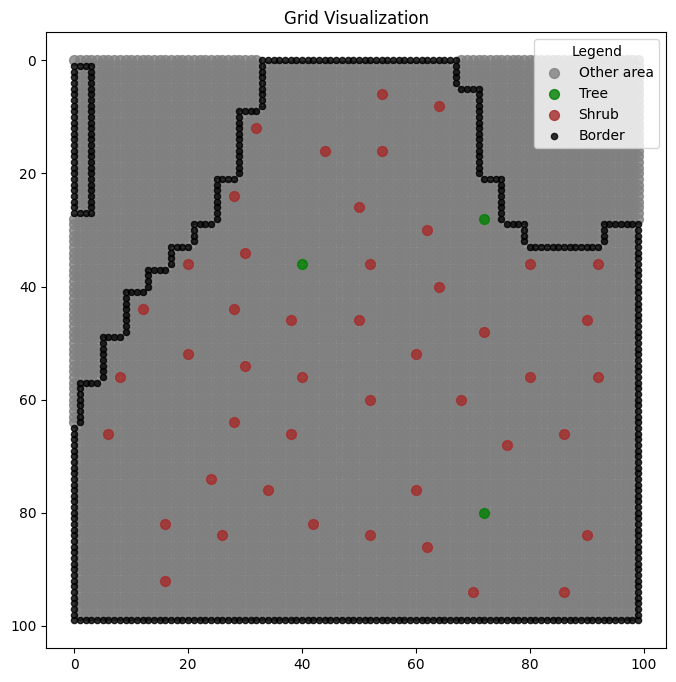

In [7]:
grid = createGrid(model_path, seed=42)
visualize_grid_with_circles(grid)

## Rewriting the start seeds function to take in a seed as well

In [30]:
def choose_starter_slots(grid, shrub_positions, distribution_seed=None, number_of_types=3, percentage_of_starters=0.8):
    """
    Selects a percentage of shrub positions to be assigned as starter slots and updates the grid with new types.

    Args:
        grid (np.ndarray): The current grid representing the environment.
        shrub_positions (list): List of tuples representing the positions of shrubs on the grid.
        distribution_seed (int): Seed for random distribution to ensure reproducibility. Default is None.
        number_of_types (int): Number of distinct starter types. Default is 3.
        percentage_of_starters (float): Percentage of shrub positions to use as starter slots. Default is 0.8 (80%).

    Returns:
        tuple: Updated grid with starter slots assigned, and a dictionary of seed locations by type.
    """
    if distribution_seed is not None:
        random.seed(distribution_seed)  # Set the seed for reproducibility

    working_grid = copy.deepcopy(grid)
    shrub_slots = copy.deepcopy(shrub_positions)
    seed_locations = {t: [] for t in range(3, 3 + number_of_types)}

    # Determine the number of starters based on the percentage
    number_of_starters = int(len(shrub_slots) * percentage_of_starters)
    number_of_starters = max(1, number_of_starters)  # Ensure at least one starter is selected

    for _ in range(number_of_starters):
        random_index = random.randint(0, len(shrub_slots) - 1)
        selected_position = shrub_slots.pop(random_index)
        # Assign a random type (3, 4, or 5) to the selected position
        assigned_type = random.randint(3, 3 + number_of_types - 1)
        working_grid[selected_position[0], selected_position[1]] = assigned_type
        seed_locations[assigned_type].append(selected_position)

    return working_grid, seed_locations


def visualize_grid_with_types(grid, type_labels=None):
    """
    Visualize a grid with different types (e.g., Open Canopy, Intermediate Canopy) using a unique color for each type.

    Args:
        grid (np.ndarray): 2D array representing the grid. Each cell value corresponds to a type.
        type_labels (dict): Optional dictionary mapping grid values to labels, e.g., {0: "Empty", 1: "Shrub", 3: "Starter Type 1"}.
    """
    # Define a colormap for visualization
    unique_values = np.unique(grid)
    colors = plt.cm.Accent(np.linspace(0, 1, len(unique_values)))  # Use a colormap for distinct colors
    
    # Create a color map dictionary
    color_map = {val: colors[i] for i, val in enumerate(unique_values)}
    type_labels = type_labels or {val: f"Type {val}" for val in unique_values}

    # Create the plot
    plt.figure(figsize=(8, 8))
    for value, color in color_map.items():
        indices = np.argwhere(grid == value)
        plt.scatter(indices[:, 1], indices[:, 0], color=color, label=type_labels.get(value, f"Type {value}"), s=50, alpha=0.8)

    plt.gca().invert_yaxis()
    plt.title("Grid Visualization with Types")
    plt.legend(title="Legend", loc='upper right')
    plt.grid(False)
    plt.show()


# Example usage
final_grid = createGrid(model_path)  # Assuming `createGrid` is defined elsewhere
trees, shrubs = extract_tree_shrub_placements(final_grid)  # Assuming `extract_tree_shrub_placements` is defined

# Use the function with a percentage of starter slots
random_points, seeds = choose_starter_slots(final_grid, shrubs, percentage_of_starters=0.8)

# # Visualize the resulting grid
# visualize_grid_with_types(random_points)


Loaded model from ./models/23rd.zip
Episode finished after 784 steps


## Rewriting the function for generating the headmap as well

In [29]:
def generate_heatmap(seed=None, distribution_seed=None, grid_size=(100, 100), octaves=4, value_range=(10, 50), invert=False):
    """
    Generate a random heatmap using Perlin noise.

    Args:
        grid_size (tuple): The size of the heatmap (width, height).
        octaves (int): Number of octaves for the Perlin noise (controls the detail level).
        seed (int or None): Seed for reproducibility. Defaults to None.
        value_range (tuple): The range of values for the heatmap (min, max).
        invert (bool): Whether to invert the values in the heatmap.
    
    Returns:
        np.ndarray: A 2D array representing the heatmap.
    """
    if distribution_seed is not None:
        random.seed(distribution_seed)
        np.random.seed(distribution_seed)
    # Initialize Perlin noise generator
    noise = PerlinNoise(octaves=octaves, seed=seed)

    # Generate noise values for the grid
    width, height = grid_size
    heatmap = np.array([[noise([i / height, j / width]) for j in range(width)] for i in range(height)])

    # Normalize the noise values to the desired range
    min_val, max_val = value_range
    heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))  # Normalize to 0-1
    
    # Invert the heatmap if required
    if invert:
        heatmap = 1 - heatmap

    heatmap = heatmap * (max_val - min_val) + min_val  # Scale to the desired range

    return heatmap

def visualize_heatmap(heatmap):
    """
    Visualize the heatmap using Matplotlib.

    Args:
        heatmap (np.ndarray): A 2D array representing the heatmap.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(heatmap, cmap="gray", origin="lower")
    plt.colorbar(label="Heatmap Value")
    plt.title("Generated Heatmap")
    plt.show()

# Generate and visualize the heatmap
# heatmap = generate_heatmap(grid_size=(100, 100), octaves=2, value_range=(10, 50), invert=True)
# # visualize_heatmap(heatmap)

## Standardising the variables in order to help control the outputs

In [ ]:
def produce_data_v2(grid_seed=None, distribution_seed = None, number_of_plants=4, percentage_shurbs=0.8, lower_noise = 10, upper_noise =80, visualise=False):
    ##
    grid = createGrid(model_path,grid_seed)
    trees, shrubs = extract_tree_shrub_placements(grid)

    random_points, seeds = choose_starter_slots(grid, shrubs, distribution_seed=distribution_seed, number_of_types=number_of_plants, percentage_of_starters=percentage_shurbs)
    heightmap = generate_heatmap(grid_size=(100, 100), distribution_seed=distribution_seed, octaves=2, value_range=(lower_noise, upper_noise), invert=True)
    plantable_grid = shade_inside_border(grid)
    # To be replaced with a proper tree radius retrival system once PoC is done
    distance_threshold = 25
    nearTree_grid = label_near_trees(grid, tree_value=1, distance_threshold=distance_threshold)

    influence_grids = {}
    for index in range(number_of_plants):
        plant_index_influence_grid = generate_influence_grid_plant_type(heightmap, seeds[3 + index])
        influence_grids[index + 3] = plant_index_influence_grid
    
    shaded_dict = {plant_type: (plant_type % 2 == 0) for plant_type in range(3, 3 + number_of_plants)}


    ## Visualisation
    if visualise:
        print(seeds)
        visualize_grid_with_types(grid)
        visualize_grid_with_types(random_points)
        visualize_heatmap(heightmap)
        visualize_binary_grid(plantable_grid)
        visualize_binary_grid(nearTree_grid)
        for index in range(number_of_plants):
            visualize_influence_grid(influence_grids[index + 3])
    return plantable_grid, nearTree_grid, influence_grids, shaded_dict, random_points

In [ ]:
def generate_random_areas_v3(grid_seed=None, distribution_seed= None, number_of_plants=4, percentage_shurbs=0.8, lower_noise = 30, upper_noise =50, threshold=0.05, visualize=False):
    """
    Generate a random distribution of plant types within the plantable area, based on influence grids and shading.
    If the influence values are very close (difference < threshold), decide randomly.

    Args:
        number_of_plants (int): The number of plant types to consider (e.g., 3, 4, 5).
        visualize (bool): Whether to visualize the grids.
        threshold (float): The maximum difference between influences to trigger random selection.

    Returns:
        np.ndarray: A grid with the randomized types assigned to plantable areas.
    """
    # Generate required grids and data
    plantable_area, nearTree_grid, influence_grids, shaded_dict, random_points = produce_data_v2(
        grid_seed= grid_seed, distribution_seed=distribution_seed, number_of_plants=number_of_plants, percentage_shurbs=percentage_shurbs, lower_noise=lower_noise, upper_noise=upper_noise, visualise=visualize
    )

    # Create a copy of the plantable area grid for random assignment
    plantable_area_copy = np.copy(plantable_area)

    # Iterate through each cell in the plantable area
    for i in range(plantable_area.shape[0]):
        for j in range(plantable_area.shape[1]):
            if plantable_area[i, j] == 128:  # If the spot is plantable
                # Calculate influence values from each type at this spot
                influences = [
                    (influence_grids[plant_type][i, j], plant_type)
                    for plant_type in range(3, 3 + number_of_plants)
                ]

                # Check if the area is shaded
                is_shaded = nearTree_grid[i, j] == 1

                # Adjust influence for shaded areas
                for idx, (influence, plant_type) in enumerate(influences):
                    if is_shaded and shaded_dict.get(plant_type, False):
                        influences[idx] = (influence + 0.1 * influence, plant_type)

                # Sort influence values with their corresponding types
                influences.sort(reverse=True, key=lambda x: x[0])  # Sort by influence value

                # Decide based on the difference between top two influences
                if abs(influences[0][0] - influences[1][0]) < threshold:
                    # Randomly select between the top two types
                    random_type = random.choice([influences[0][1], influences[1][1]])
                else:
                    # Select the type with the highest influence
                    random_type = influences[0][1]

                # Assign the type to the plantable area copy
                plantable_area_copy[i, j] = random_type


    return plantable_area_copy

Loaded model from ./models/23rd.zip
Episode finished after 558 steps


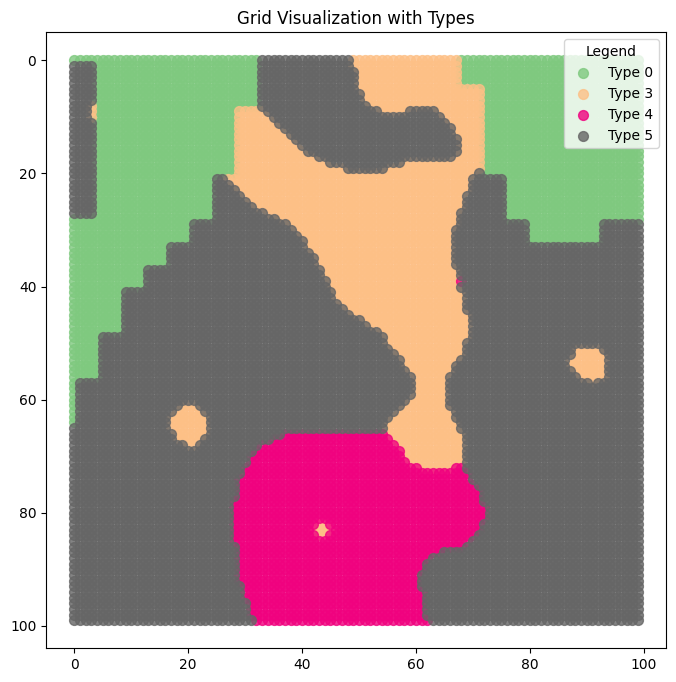

In [52]:
generation = generate_random_areas_v3(grid_seed=42, distribution_seed=42, number_of_plants=4, visualize=False)
visualize_grid_with_types(generation)

### Small Problem is that Idk if you can set seeds for RL generation, so bcos of that the list of seeds keeps changing

## Drawing Circles

Firstly, we will do the truthful approach, where we draw the actual nodes and then draw the nodes around them

In [102]:
def visualize_grid_with_types_and_outlines(grid, shrubs_dict, type_labels=None):
    """
    Visualize a grid with different types and draw outlines for specific points from a dictionary of shrubs.

    Args:
        grid (np.ndarray): 2D array representing the grid. Each cell value corresponds to a type.
        shrubs_dict (dict): Dictionary where keys are types and values are lists of (y, x) positions.
        type_labels (dict): Optional dictionary mapping grid values to labels, e.g., {0: "Empty", 1: "Shrub", 3: "Starter Type 1"}.
    """
    # Define a colormap for visualization
    unique_values = np.unique(grid)
    colors = plt.cm.Accent(np.linspace(0, 1, len(unique_values)))  # Use a colormap for distinct colors
    
    # Create a color map dictionary
    color_map = {val: colors[i] for i, val in enumerate(unique_values)}
    type_labels = type_labels or {val: f"Type {val}" for val in unique_values}

    # Create the plot
    plt.figure(figsize=(8, 8))
    ax = plt.gca()

    # Draw the grid points
    for value, color in color_map.items():
        indices = np.argwhere(grid == value)
        plt.scatter(
            indices[:, 1],
            indices[:, 0],
            color=color,
            label=type_labels.get(value, f"Type {value}"),
            s=50,
            alpha=0.8
        )

    # Draw the outlines for shrubs
    for shrub_type, positions in shrubs_dict.items():
        for y, x in positions:
            # Draw only the outline of the circle with a smaller radius
            outline_color = color_map.get(shrub_type, (0, 0, 0))  # Default to black if type not in color map
            circle = mpatches.Circle(
                (x, y),
                radius=1.0,            # Smaller radius
                facecolor='none',      # No fill, only outline
                edgecolor=outline_color,  # Outline color matching shrub type
                linewidth=1.5,         # Line width of the outline
                zorder=5
            )
            ax.add_patch(circle)

    # Invert y-axis for correct orientation
    ax.invert_yaxis()
    plt.title("Grid Visualization with Shrub Outlines")
    plt.legend(title="Legend", loc='upper right')
    plt.grid(False)
    plt.show()

In [103]:
def generate_random_areas_v4(grid_seed=None, distribution_seed= None, number_of_plants=4, percentage_shurbs=0.8, lower_noise = 30, upper_noise =50, threshold=0.05, visualize=False):
    """
    Generate a random distribution of plant types within the plantable area, based on influence grids and shading.
    If the influence values are very close (difference < threshold), decide randomly.

    Args:
        number_of_plants (int): The number of plant types to consider (e.g., 3, 4, 5).
        visualize (bool): Whether to visualize the grids.
        threshold (float): The maximum difference between influences to trigger random selection.

    Returns:
        np.ndarray: A grid with the randomized types assigned to plantable areas.
    """
    # Generate required grids and data
    plantable_area, nearTree_grid, influence_grids, shaded_dict, seeds = produce_data_v3(
        grid_seed= grid_seed, distribution_seed=distribution_seed, number_of_plants=number_of_plants, percentage_shurbs=percentage_shurbs, lower_noise=lower_noise, upper_noise=upper_noise, visualise=visualize
    )

    # Create a copy of the plantable area grid for random assignment
    plantable_area_copy = np.copy(plantable_area)

    # Iterate through each cell in the plantable area
    for i in range(plantable_area.shape[0]):
        for j in range(plantable_area.shape[1]):
            if plantable_area[i, j] == 128:  # If the spot is plantable
                # Calculate influence values from each type at this spot
                influences = [
                    (influence_grids[plant_type][i, j], plant_type)
                    for plant_type in range(3, 3 + number_of_plants)
                ]

                # Check if the area is shaded
                is_shaded = nearTree_grid[i, j] == 1

                # Adjust influence for shaded areas
                for idx, (influence, plant_type) in enumerate(influences):
                    if is_shaded and shaded_dict.get(plant_type, False):
                        influences[idx] = (influence + 0.1 * influence, plant_type)

                # Sort influence values with their corresponding types
                influences.sort(reverse=True, key=lambda x: x[0])  # Sort by influence value

                # Decide based on the difference between top two influences
                if abs(influences[0][0] - influences[1][0]) < threshold:
                    # Randomly select between the top two types
                    random_type = random.choice([influences[0][1], influences[1][1]])
                else:
                    # Select the type with the highest influence
                    random_type = influences[0][1]

                # Assign the type to the plantable area copy
                plantable_area_copy[i, j] = random_type
            
        
    visualize_grid_with_types_and_outlines(plantable_area_copy, seeds)

    return plantable_area_copy

In [104]:
def postprocessing_replace_values(final_grid, shrubs):
    """
    Replace the values in the final grid based on the shrub dictionary.

    Args:
        final_grid (np.ndarray): The final grid with randomized types assigned to plantable areas.
        shrubs (dict): Dictionary with shrub types as keys and lists of (y, x) positions as values.

    Returns:
        np.ndarray: A modified grid with updated values based on the shrub dictionary.
    """
    # Make a copy of the final grid
    modified_grid = np.copy(final_grid)

    # Iterate over each shrub type in the dictionary
    for shrub_type, positions in shrubs.items():
        for y, x in positions:
            # Update the grid value to match the shrub type
            modified_grid[y, x] = shrub_type

    return modified_grid

In [105]:
def produce_data_v3(grid_seed=None, distribution_seed = None, number_of_plants=4, percentage_shurbs=0.8, lower_noise = 10, upper_noise =80, visualise=False):
    ##
    grid = createGrid(model_path,grid_seed)
    trees, shrubs = extract_tree_shrub_placements(grid)

    random_points, seeds = choose_starter_slots(grid, shrubs, distribution_seed=distribution_seed, number_of_types=number_of_plants, percentage_of_starters=percentage_shurbs)
    heightmap = generate_heatmap(grid_size=(100, 100), distribution_seed=distribution_seed, octaves=2, value_range=(lower_noise, upper_noise), invert=True)
    plantable_grid = shade_inside_border(grid)
    # To be replaced with a proper tree radius retrival system once PoC is done
    distance_threshold = 25
    nearTree_grid = label_near_trees(grid, tree_value=1, distance_threshold=distance_threshold)

    influence_grids = {}
    for index in range(number_of_plants):
        plant_index_influence_grid = generate_influence_grid_plant_type(heightmap, seeds[3 + index])
        influence_grids[index + 3] = plant_index_influence_grid
    
    shaded_dict = {plant_type: (plant_type % 2 == 0) for plant_type in range(3, 3 + number_of_plants)}


    ## Visualisation
    if visualise:
        print(seeds)
        visualize_grid_with_types(grid)
        visualize_grid_with_types(random_points)
        visualize_heatmap(heightmap)
        visualize_binary_grid(plantable_grid)
        visualize_binary_grid(nearTree_grid)
        for index in range(number_of_plants):
            visualize_influence_grid(influence_grids[index + 3])
    return plantable_grid, nearTree_grid, influence_grids, shaded_dict, seeds

In [106]:
def generate_random_areas_v4(grid_seed=None, distribution_seed= None, number_of_plants=4, percentage_shurbs=0.8, lower_noise = 30, upper_noise =50, threshold=0.05, visualize=False):
    """
    Generate a random distribution of plant types within the plantable area, based on influence grids and shading.
    If the influence values are very close (difference < threshold), decide randomly.

    Args:
        number_of_plants (int): The number of plant types to consider (e.g., 3, 4, 5).
        visualize (bool): Whether to visualize the grids.
        threshold (float): The maximum difference between influences to trigger random selection.

    Returns:
        np.ndarray: A grid with the randomized types assigned to plantable areas.
    """
    # Generate required grids and data
    plantable_area, nearTree_grid, influence_grids, shaded_dict, seeds = produce_data_v3(
        grid_seed= grid_seed, distribution_seed=distribution_seed, number_of_plants=number_of_plants, percentage_shurbs=percentage_shurbs, lower_noise=lower_noise, upper_noise=upper_noise, visualise=visualize
    )

    # Create a copy of the plantable area grid for random assignment
    plantable_area_copy = np.copy(plantable_area)

    # Iterate through each cell in the plantable area
    for i in range(plantable_area.shape[0]):
        for j in range(plantable_area.shape[1]):
            if plantable_area[i, j] == 128:  # If the spot is plantable
                # Calculate influence values from each type at this spot
                influences = [
                    (influence_grids[plant_type][i, j], plant_type)
                    for plant_type in range(3, 3 + number_of_plants)
                ]

                # Check if the area is shaded
                is_shaded = nearTree_grid[i, j] == 1

                # Adjust influence for shaded areas
                for idx, (influence, plant_type) in enumerate(influences):
                    if is_shaded and shaded_dict.get(plant_type, False):
                        influences[idx] = (influence + 0.1 * influence, plant_type)

                # Sort influence values with their corresponding types
                influences.sort(reverse=True, key=lambda x: x[0])  # Sort by influence value

                # Decide based on the difference between top two influences
                if abs(influences[0][0] - influences[1][0]) < threshold:
                    # Randomly select between the top two types
                    random_type = random.choice([influences[0][1], influences[1][1]])
                else:
                    # Select the type with the highest influence
                    random_type = influences[0][1]

                # Assign the type to the plantable area copy
                plantable_area_copy[i, j] = random_type
            
        
    visualize_grid_with_types_and_outlines(plantable_area_copy, seeds)

    return plantable_area_copy

Loaded model from ./models/23rd.zip
Episode finished after 695 steps


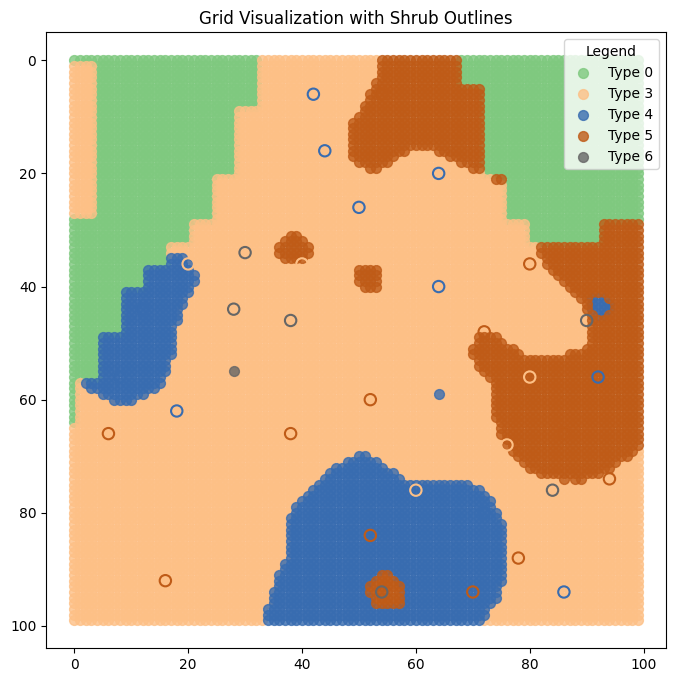

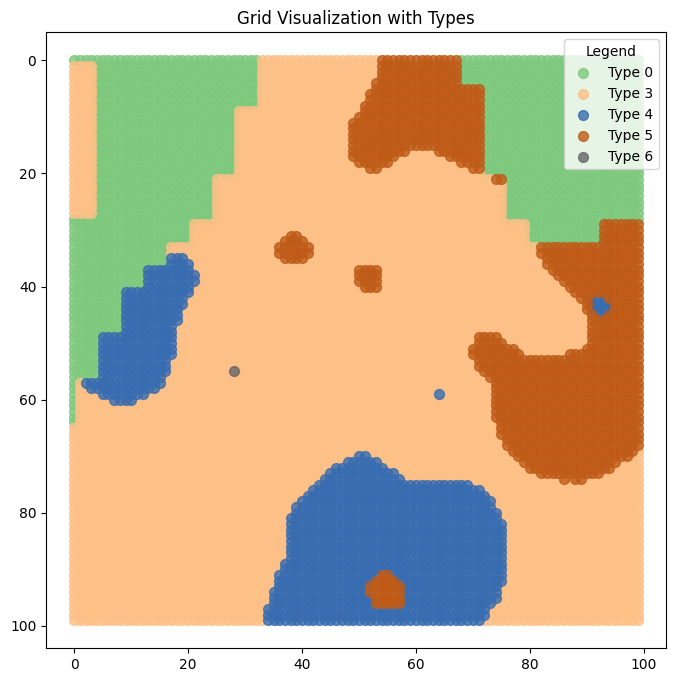

In [107]:
generation = generate_random_areas_v4(grid_seed=42, distribution_seed=42, number_of_plants=4, visualize=False)
visualize_grid_with_types(generation)


## Lmao it do be time to lie

In [110]:
def visualize_grid_with_outlines(grid, shrubs_dict, type_labels=None):
    """
    Visualize a grid with different types and draw outlines for specific points from a dictionary of shrubs.

    Args:
        grid (np.ndarray): 2D array representing the grid. Each cell value corresponds to a type.
        shrubs_dict (dict): Dictionary where keys are types and values are lists of (y, x) positions.
        type_labels (dict): Optional dictionary mapping grid values to labels, e.g., {0: "Empty", 1: "Shrub", 3: "Starter Type 1"}.
    """
    # Define a colormap for visualization
    unique_values = np.unique(grid)
    colors = plt.cm.Accent(np.linspace(0, 1, len(unique_values)))  # Use a colormap for distinct colors
    
    # Create a color map dictionary
    color_map = {val: colors[i] for i, val in enumerate(unique_values)}
    type_labels = type_labels or {val: f"Type {val}" for val in unique_values}

    # Create the plot
    plt.figure(figsize=(8, 8))
    ax = plt.gca()

    # Draw the grid points
    for value, color in color_map.items():
        indices = np.argwhere(grid == value)
        plt.scatter(
            indices[:, 1],
            indices[:, 0],
            color=color,
            label=type_labels.get(value, f"Type {value}"),
            s=50,
            alpha=0.8
        )

    # Draw the outlines for shrubs
    for shrub_type, positions in shrubs_dict.items():
        for y, x in positions:
            # Draw only the outline of the circle with a smaller radius
            circle = mpatches.Circle(
                (x, y),
                radius=1.0,            # Smaller radius
                facecolor='none',      # No fill, only outline
                edgecolor='black',     # Black outline
                linewidth=1.5,         # Line width of the outline
                zorder=5
            )
            ax.add_patch(circle)

    # Invert y-axis for correct orientation
    ax.invert_yaxis()
    plt.title("Grid Visualization with Shrub Outlines")
    plt.legend(title="Legend", loc='upper right')
    plt.grid(False)
    plt.show()


In [111]:
def generate_random_areas_v4(grid_seed=None, distribution_seed= None, number_of_plants=4, percentage_shurbs=0.8, lower_noise = 30, upper_noise =50, threshold=0.05, visualize=False):
    """
    Generate a random distribution of plant types within the plantable area, based on influence grids and shading.
    If the influence values are very close (difference < threshold), decide randomly.

    Args:
        number_of_plants (int): The number of plant types to consider (e.g., 3, 4, 5).
        visualize (bool): Whether to visualize the grids.
        threshold (float): The maximum difference between influences to trigger random selection.

    Returns:
        np.ndarray: A grid with the randomized types assigned to plantable areas.
    """
    # Generate required grids and data
    plantable_area, nearTree_grid, influence_grids, shaded_dict, seeds = produce_data_v3(
        grid_seed= grid_seed, distribution_seed=distribution_seed, number_of_plants=number_of_plants, percentage_shurbs=percentage_shurbs, lower_noise=lower_noise, upper_noise=upper_noise, visualise=visualize
    )

    # Create a copy of the plantable area grid for random assignment
    plantable_area_copy = np.copy(plantable_area)

    # Iterate through each cell in the plantable area
    for i in range(plantable_area.shape[0]):
        for j in range(plantable_area.shape[1]):
            if plantable_area[i, j] == 128:  # If the spot is plantable
                # Calculate influence values from each type at this spot
                influences = [
                    (influence_grids[plant_type][i, j], plant_type)
                    for plant_type in range(3, 3 + number_of_plants)
                ]

                # Check if the area is shaded
                is_shaded = nearTree_grid[i, j] == 1

                # Adjust influence for shaded areas
                for idx, (influence, plant_type) in enumerate(influences):
                    if is_shaded and shaded_dict.get(plant_type, False):
                        influences[idx] = (influence + 0.1 * influence, plant_type)

                # Sort influence values with their corresponding types
                influences.sort(reverse=True, key=lambda x: x[0])  # Sort by influence value

                # Decide based on the difference between top two influences
                if abs(influences[0][0] - influences[1][0]) < threshold:
                    # Randomly select between the top two types
                    random_type = random.choice([influences[0][1], influences[1][1]])
                else:
                    # Select the type with the highest influence
                    random_type = influences[0][1]

                # Assign the type to the plantable area copy
                plantable_area_copy[i, j] = random_type
            
        
    return plantable_area_copy, seeds

Loaded model from ./models/23rd.zip
Episode finished after 851 steps


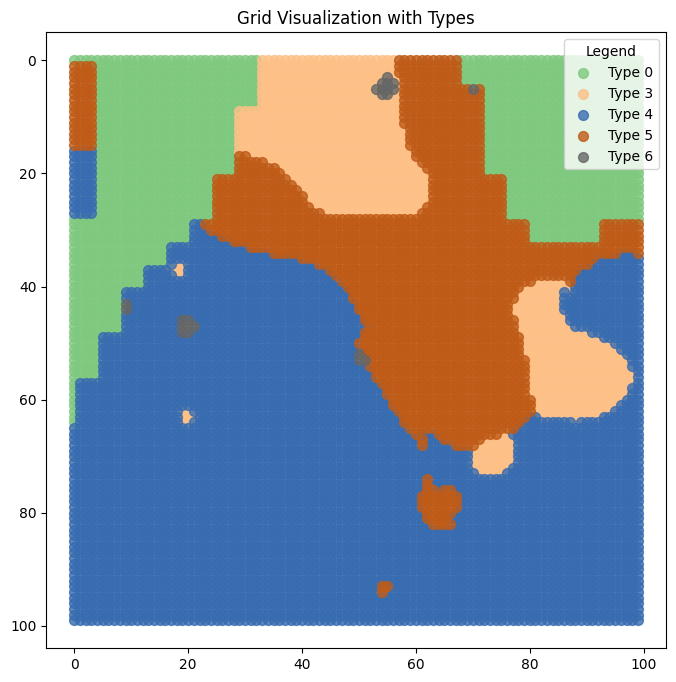

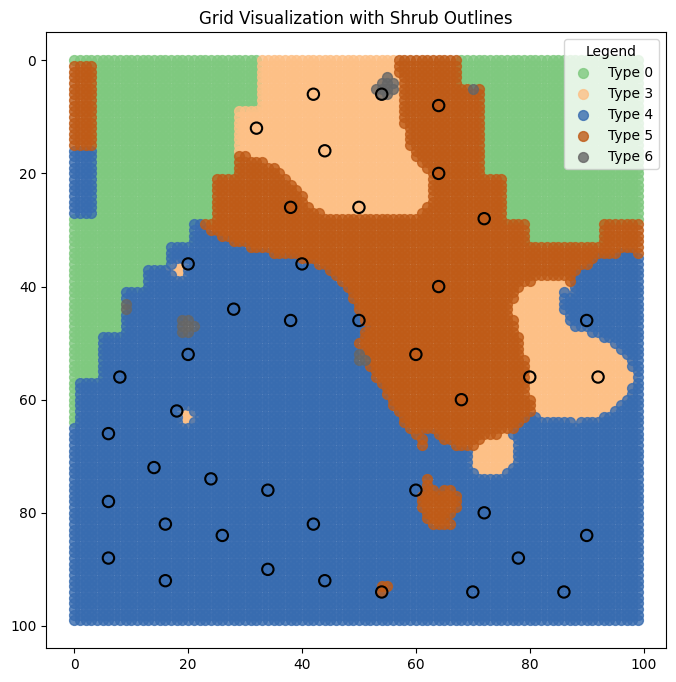

In [112]:
generation, seeds = generate_random_areas_v4(grid_seed=42, distribution_seed=42, number_of_plants=4, visualize=False)
visualize_grid_with_types(generation)
visualize_grid_with_outlines(generation, seeds)


### UMMM, so I think need to try increaseing the amount of minimum space or at least help them thrive a bit lol

- Things that I could try in the future, 
    - for each region below a certain size, check if there is a dot inside, if there is expand the area a small amount
    - remove sizes below a certain size
    


# Tier 2
Things to work on:
- Adding an influence fromn the contour lines based on the shape of the region in conjuction to the noise, in the ratio of alpha + beta (new variables)
- Experiment with different tpyes of noise (Record the difference in results when using perlin, Worley, anymore etc.)
- Include jitter to move shrub locations that can be toggled for the sake of naturalistic planting
    - Randomly (v2 model)